## THE CHALLENGE

É esperado que definam, descrevam e expliquem, de forma analítica, os clusters que selecionarem. 

É importante que invistam algum tempo no racional que querem dar ao vosso processo de segmentação, que pensem nas diferentes abordagens possíveis, e quais as suas vantagens e desvantagens.

No final deverão apresentar a vossa decisão final, mas também as vossas tentativas falhadas. Queremos perceber o vosso processo de decisão até chegarem à solução que propõem, bem como as justificações para tal.

É esperado que usem data engineering e model training em python.

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

In [31]:
# importing file
df_challenge = pd.read_csv(r'SAD_Challenge.csv', index_col=0)
df_challenge.head()

,First Policy´s Year,Customer Age,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations
Customer Identity,,,,,,,,,,,,,
1,1985.0,34.0,2 - High School,4354.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
2,1981.0,21.0,2 - High School,1353.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
3,1991.0,46.0,1 - Basic,4554.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
4,1990.0,35.0,3 - BSc/MSc,2197.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
5,1986.0,43.0,3 - BSc/MSc,3526.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45


In [32]:
print('Shape: ', df_challenge.shape)
df_challenge.info()

Shape:  (10296, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10296 entries, 1 to 10296
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   First Policy´s Year                  10266 non-null  float64
 1   Customer Age                         10279 non-null  float64
 2   Educational Degree                   10279 non-null  object 
 3   Gross Monthly Salary                 10260 non-null  float64
 4   Geographic Living Area               10295 non-null  float64
 5   Has Children (Y=1)                   10275 non-null  float64
 6   Customer Monetary Value              10296 non-null  float64
 7   Claims Rate                          10296 non-null  float64
 8   Premiums in LOB: Motor               10262 non-null  float64
 9   Premiums in LOB: Household           10296 non-null  float64
 10  Premiums in LOB: Health              10253 non-null  float64
 11  Premiums

In [33]:
df_challenge.columns

Index(['First Policy´s Year', 'Customer Age', 'Educational Degree',
       'Gross Monthly Salary', 'Geographic Living Area', 'Has Children (Y=1)',
       'Customer Monetary Value', 'Claims Rate', 'Premiums in LOB: Motor',
       'Premiums in LOB: Household', 'Premiums in LOB: Health',
       'Premiums in LOB:  Life', 'Premiums in LOB: Work Compensations'],
      dtype='object')

In [34]:
df_challenge.describe()

,First Policy´s Year,Customer Age,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations
count,10266.000000,10279.000000,10260.000000,10295.000000,10275.000000,10296.000000,10296.000000,10262.000000,10296.000000,10253.000000,10192.000000,10210.000000
mean,1991.062634,47.992217,5012.838596,2.709859,0.706764,177.892605,0.742772,300.470252,210.431192,171.580833,41.855782,41.277514
std,511.267913,19.709476,2314.902129,1.266291,0.455268,1945.811505,2.916964,211.914997,352.595984,296.405976,47.480632,51.513572
min,1974.000000,15.000000,665.000000,1.000000,0.000000,-165680.420000,0.000000,-4.110000,-75.000000,-2.110000,-7.000000,-12.000000
25%,1980.000000,33.000000,3411.000000,1.000000,0.000000,-9.440000,0.390000,190.590000,49.450000,111.800000,9.890000,10.670000
50%,1986.000000,48.000000,5002.500000,3.000000,1.000000,186.870000,0.720000,298.610000,132.800000,162.810000,25.560000,25.670000
75%,1992.000000,63.000000,6580.250000,4.000000,1.000000,399.777500,0.980000,408.300000,290.050000,219.820000,57.790000,56.790000
max,53784.000000,988.000000,110430.000000,4.000000,1.000000,11875.890000,256.200000,11604.420000,25048.800000,28272.000000,398.300000,1988.700000


## Análise das colunas 

### First Policy´s Year 
(Primeiro ano da apólice)

In [35]:
df_challenge['First Policy´s Year'].describe()

count    10266.000000
mean      1991.062634
std        511.267913
min       1974.000000
25%       1980.000000
50%       1986.000000
75%       1992.000000
max      53784.000000
Name: First Policy´s Year, dtype: float64

In [36]:
# Número de nulos 
df_challenge['First Policy´s Year'].isna().sum()

30

In [37]:
# Remover as linhas com nulos
df = df_challenge[df_challenge['First Policy´s Year'].notna()]
df.shape

(10266, 13)

In [38]:
df['First Policy´s Year'].describe()

count    10266.000000
mean      1991.062634
std        511.267913
min       1974.000000
25%       1980.000000
50%       1986.000000
75%       1992.000000
max      53784.000000
Name: First Policy´s Year, dtype: float64

In [39]:
df[df['First Policy´s Year'] > 2022]

,First Policy´s Year,Customer Age,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations
Customer Identity,,,,,,,,,,,,,
9295,53784.0,68.0,3 - BSc/MSc,6535.0,1.0,0.0,348.85,0.37,351.4,15.0,187.37,22.45,17.78


In [40]:
# Remover linhas com anos não válidos
df = df.drop(df[df['First Policy´s Year'] > 2022].index)

In [41]:
df['First Policy´s Year'].describe()

count    10265.000000
mean      1986.017048
std          6.612110
min       1974.000000
25%       1980.000000
50%       1986.000000
75%       1992.000000
max       1998.000000
Name: First Policy´s Year, dtype: float64

In [42]:
# Dataframe com as contagens de clientes em cada ano (é necessário para fazer o gráfico de barras)
df_1Year_count = pd.DataFrame(df.groupby('First Policy´s Year')['First Policy´s Year'].count())
df_1Year_count = df_1Year_count.rename(columns={'First Policy´s Year': 'count'})
df_1Year_count.reset_index(inplace= True)

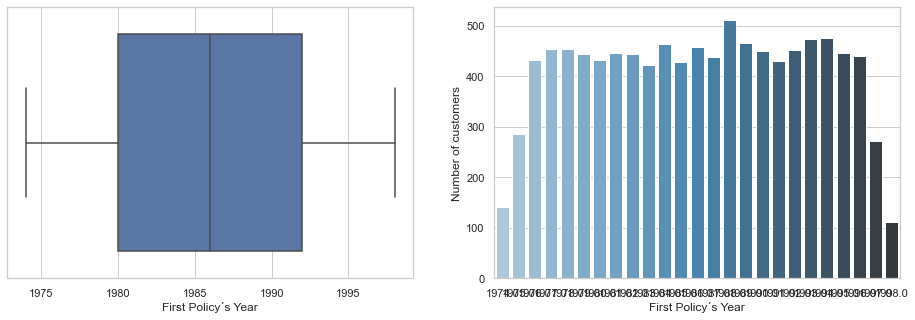

In [43]:
fig, ax =plt.subplots(1,2, figsize =(16,5))
#sns.set_theme(style="whitegrid")
sns.boxplot(x=df['First Policy´s Year'], ax = ax[0])
ax = sns.barplot(data=df_1Year_count, x='First Policy´s Year',y='count', ax = ax[1],palette="Blues_d")
ax.set(ylabel='Number of customers')
plt.show()

### Customer Age

In [44]:
df['Customer Age'].describe()

count    10251.000000
mean        47.979612
std         19.716262
min         15.000000
25%         33.000000
50%         48.000000
75%         63.000000
max        988.000000
Name: Customer Age, dtype: float64

In [45]:
# Número de nulos 
df['Customer Age'].isna().sum()

14

In [46]:
# Remover as linhas com nulos
df = df[df['Customer Age'].notna()]
df.shape

(10251, 13)

In [47]:
df[df['Customer Age'] < 1998 - df['First Policy´s Year']]

# A idade dos clientes corresponde à idade "atual" ou é a idade que tinham quando se tornaram clientes

,First Policy´s Year,Customer Age,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations
Customer Identity,,,,,,,,,,,,,
169,1977.0,19.0,2 - High School,1854.0,4.0,1.0,205.16,0.72,158.03,313.40,245.38,93.13,9.89
382,1977.0,20.0,3 - BSc/MSc,2330.0,4.0,1.0,570.10,0.45,183.59,595.10,135.58,121.80,48.90
469,1977.0,19.0,1 - Basic,2514.0,4.0,1.0,220.92,0.76,59.01,506.75,118.91,242.49,77.35
498,1977.0,18.0,1 - Basic,2519.0,4.0,1.0,-64.12,1.04,120.58,641.80,128.69,153.14,39.12
562,1977.0,19.0,2 - High School,1637.0,4.0,1.0,900.39,0.19,67.79,682.90,223.93,173.70,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1978.0,17.0,1 - Basic,1476.0,4.0,1.0,365.19,0.53,57.12,293.95,100.02,276.83,96.24
10132,1977.0,19.0,1 - Basic,1972.0,3.0,1.0,1200.44,0.11,67.79,958.50,79.46,33.34,233.60
10153,1978.0,18.0,1 - Basic,3500.0,1.0,1.0,293.17,0.61,130.47,271.15,105.13,270.83,47.34


In [48]:
df[df['Customer Age'] > 100]

,First Policy´s Year,Customer Age,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations
Customer Identity,,,,,,,,,,,,,
7196,1993.0,988.0,3 - BSc/MSc,5659.0,4.0,0.0,146.02,0.77,428.97,192.8,108.91,1.89,23.67


In [49]:
# Remover linhas com idade não válida
df = df.drop(df[df['Customer Age'] > 100].index)

In [50]:
df['Customer Age'].describe()

count    10250.000000
mean        47.887902
std         17.393777
min         15.000000
25%         33.000000
50%         48.000000
75%         63.000000
max         81.000000
Name: Customer Age, dtype: float64

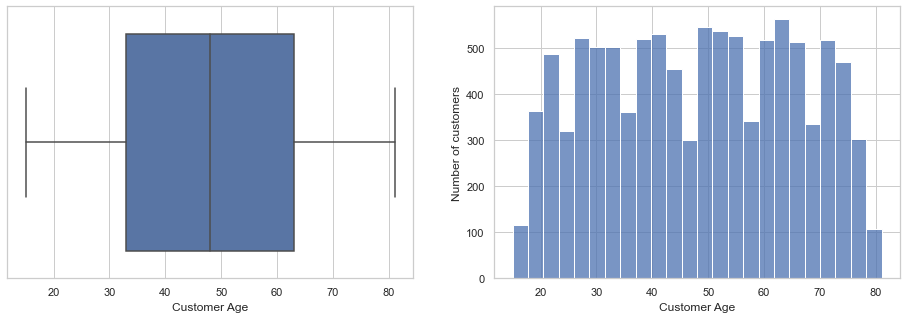

In [51]:
fig, ax =plt.subplots(1,2, figsize =(16,5))
sns.set_theme(style="whitegrid")
sns.boxplot(x=df['Customer Age'], ax = ax[0])
ax = sns.histplot(data=df, x='Customer Age',ax = ax[1])
ax.set(ylabel='Number of customers')
plt.show()

### Educational Degree
(Nível de escolaridade)

In [52]:
#Educational degree: Basic -> 1 | High School -> 2 | BSc/MSc -> 3 | PhD -> 4

df['Educational Degree'] = df['Educational Degree'].replace(['1 - Basic'],'1')
df['Educational Degree'] = df['Educational Degree'].replace(['2 - High School'],'2')
df['Educational Degree'] = df['Educational Degree'].replace(['3 - BSc/MSc'],'3')
df['Educational Degree'] = df['Educational Degree'].replace(['4 - PhD'],'4')

In [53]:
df['Educational Degree'].describe()

count     10248
unique        4
top           3
freq       4789
Name: Educational Degree, dtype: object

In [54]:
# Número de nulos 
df['Educational Degree'].isna().sum()


2

In [55]:
# Remover as linhas com nulos
df = df[df['Educational Degree'].notna()]
df.shape

(10248, 13)

In [56]:
# Dataframe com as contagens por nível de escolaridade
df_degree_count = pd.DataFrame(df.groupby('Educational Degree')['Educational Degree'].count())
df_degree_count = df_degree_count.rename(columns={'Educational Degree': 'count'})
df_degree_count.reset_index(inplace= True)
df_degree_count

,Educational Degree,count
0,1,1268
1,2,3497
2,3,4789
3,4,694


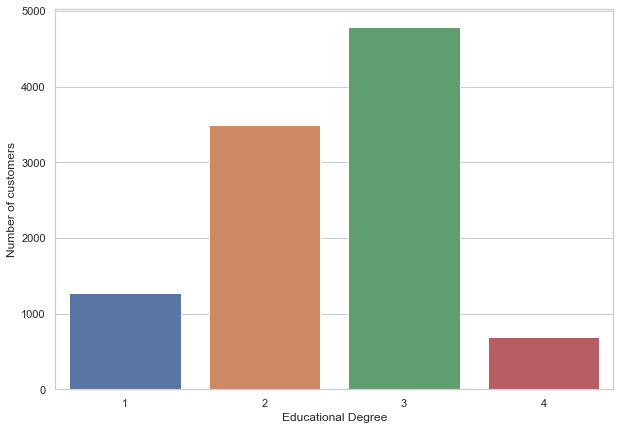

In [57]:
fig = plt.figure(figsize = (10, 7))
sns.set_theme(style="whitegrid")
ax = sns.barplot(data=df_degree_count, x='Educational Degree',y='count')
ax.set(ylabel='Number of customers')
plt.savefig('Educational Degree')
plt.show()

### Gross Monthly Salary
(Salário Bruto Mensal)

In [58]:
df['Gross Monthly Salary'].describe()

count     10215.000000
mean       5011.027411
std        2316.740188
min         665.000000
25%        3409.000000
50%        5000.000000
75%        6580.500000
max      110430.000000
Name: Gross Monthly Salary, dtype: float64

In [59]:
# Número de nulos 
df['Gross Monthly Salary'].isna().sum()

33

In [60]:
# Remover as linhas com nulos
df = df[df['Gross Monthly Salary'].notna()]
df.shape

(10215, 13)

In [61]:
df[df['Gross Monthly Salary'] > 11000]

# Estes casos são considerados?

,First Policy´s Year,Customer Age,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations
Customer Identity,,,,,,,,,,,,,
5883,1995.0,60.0,2,110430.0,4.0,1.0,122.25,0.79,281.83,147.25,130.58,84.46,66.68
8262,1981.0,25.0,2,68981.0,4.0,0.0,608.89,0.28,57.01,358.95,195.26,113.80,161.14


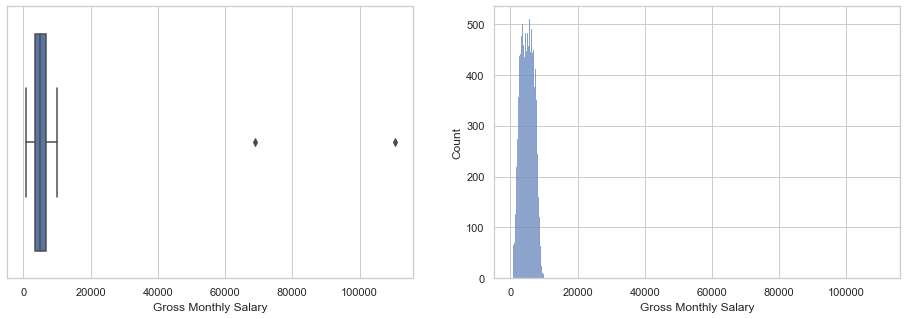

In [62]:
fig, ax =plt.subplots(1,2, figsize =(16,5))
sns.set_theme(style="whitegrid")
sns.boxplot(x=df['Gross Monthly Salary'], ax = ax[0])
sns.histplot(data=df, x='Gross Monthly Salary',ax = ax[1])
plt.show()

### Geographic Living Area
(Área de residência)

In [63]:
df['Geographic Living Area'].describe()

count    10215.000000
mean         2.711698
std          1.266132
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: Geographic Living Area, dtype: float64

In [64]:
# Número de nulos 
df['Geographic Living Area'].isna().sum()

0

In [65]:
# Dataframe com as contagens por área geográfica
df_area_count = pd.DataFrame(df.groupby('Geographic Living Area')['Geographic Living Area'].count())
df_area_count = df_area_count.rename(columns={'Geographic Living Area': 'count'})
df_area_count.reset_index(inplace= True)
df_area_count

,Geographic Living Area,count
0,1.0,3021
1,2.0,1021
2,3.0,2055
3,4.0,4118


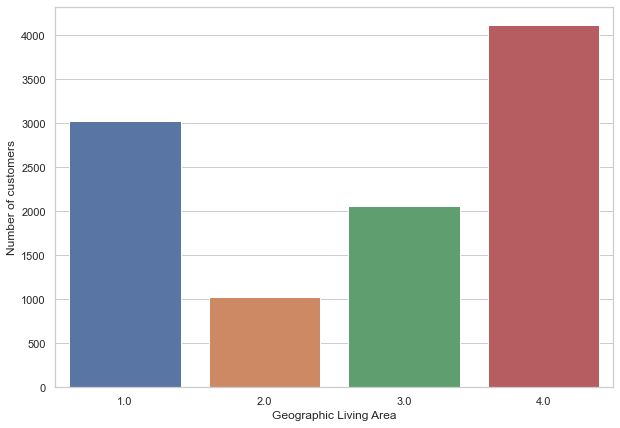

In [66]:
fig = plt.figure(figsize = (10, 7))
sns.set_theme(style="whitegrid")
ax = sns.barplot(data=df_area_count, x='Geographic Living Area',y='count')
ax.set(ylabel='Number of customers')
plt.show()

### Has Children (Y=1)

In [67]:
df['Has Children (Y=1)'].describe()

count    10202.000000
mean         0.706822
std          0.455242
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Has Children (Y=1), dtype: float64

In [68]:
# Número de nulos 
df['Has Children (Y=1)'].isna().sum()

13

In [69]:
# Preecher nulos por 0 --> VERIFICAR se os nulos ficam zero ou se são removidos
df['Has Children (Y=1)'] = df['Has Children (Y=1)'].fillna(0)

# Número de nulos 
df['Has Children (Y=1)'].isna().sum()

0

In [70]:
# Dataframe com as contagens do 'Has Children (Y=1)'
df_children_count = pd.DataFrame(df.groupby('Has Children (Y=1)')['Has Children (Y=1)'].count())
df_children_count = df_children_count.rename(columns={'Has Children (Y=1)': 'count'})
df_children_count.reset_index(inplace= True)
df_children_count

,Has Children (Y=1),count
0,0.0,3004
1,1.0,7211


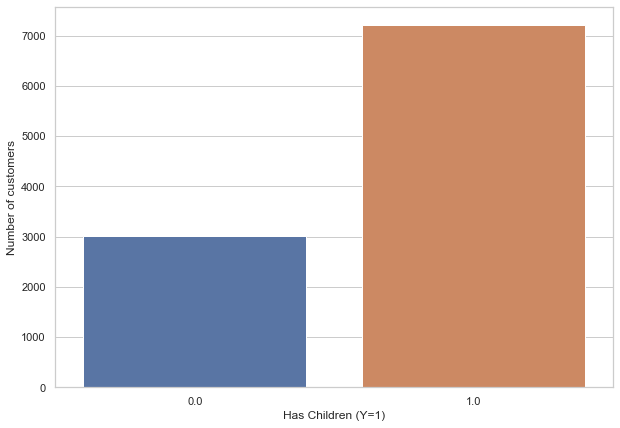

In [71]:
fig = plt.figure(figsize = (10, 7))
sns.set_theme(style="whitegrid")
ax = sns.barplot(data=df_children_count, x='Has Children (Y=1)',y='count')
ax.set(ylabel='Number of customers')
plt.show()

### Customer Monetary Value

In [72]:
df['Customer Monetary Value'].describe()

count     10215.000000
mean        177.854219
std        1953.413314
min     -165680.420000
25%          -9.440000
50%         187.150000
75%         399.860000
max       11875.890000
Name: Customer Monetary Value, dtype: float64

In [73]:
# Número de nulos 
df['Customer Monetary Value'].isna().sum()

0

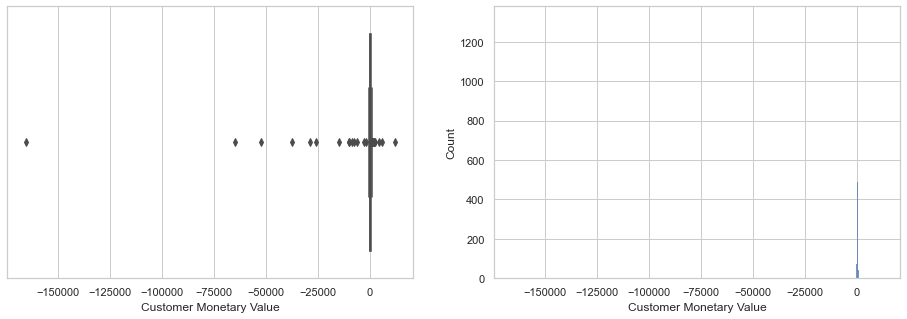

In [74]:
fig, ax =plt.subplots(1,2, figsize =(16,5))
sns.set_theme(style="whitegrid")
sns.boxplot(x=df['Customer Monetary Value'], ax = ax[0])
sns.histplot(data=df, x='Customer Monetary Value',ax = ax[1])
plt.show()

### Claims Rate
(Taxa de sinistralidade)

𝐶𝑙𝑎𝑖𝑚𝑠 − Amount paid by the company to cover a customer claim

A taxa de sinistralidade corresponde à relação entre os custos e as receitas de uma seguradora.

Normalmente, a taxa de sinistralidade é medida em percentual, relacionando todos os gastos que a seguradora tem em um período determinado (mensal, semestral ou anual).Seu cálculo funciona da seguinte forma:

    - todas as situações de sinistro do período são somadas;
    - divide-se o valor obtido pelo prêmio pago; alcançando um percentual.

In [75]:
df['Claims Rate'].describe()

count    10215.000000
mean         0.743252
std          2.928350
min          0.000000
25%          0.390000
50%          0.720000
75%          0.980000
max        256.200000
Name: Claims Rate, dtype: float64

In [76]:
# Número de nulos 
df['Claims Rate'].isna().sum()

0

In [77]:
# o valor pode ser superior a 1?
df[df['Claims Rate'] > 1]

,First Policy´s Year,Customer Age,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations
Customer Identity,,,,,,,,,,,,,
2,1981.0,21.0,2,1353.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
7,1979.0,73.0,2,8205.0,4.0,0.0,-66.01,1.05,156.92,295.60,317.95,14.67,26.34
8,1988.0,42.0,2,3485.0,4.0,1.0,-144.91,1.13,248.27,397.30,144.36,66.68,53.23
10,1976.0,68.0,3,7684.0,1.0,0.0,-119.35,1.12,209.26,182.25,271.94,39.23,55.12
14,1983.0,16.0,1,2086.0,3.0,1.0,-75.12,1.06,44.34,342.85,127.69,267.94,94.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10273,1978.0,70.0,3,6886.0,4.0,0.0,-35.89,1.02,326.73,142.80,207.26,10.89,20.56
10275,1995.0,26.0,3,3458.0,2.0,1.0,-58.78,1.06,187.59,28.90,295.61,33.34,62.68
10280,1978.0,39.0,2,2808.0,3.0,1.0,-66.12,1.06,280.94,176.15,196.48,41.12,32.23


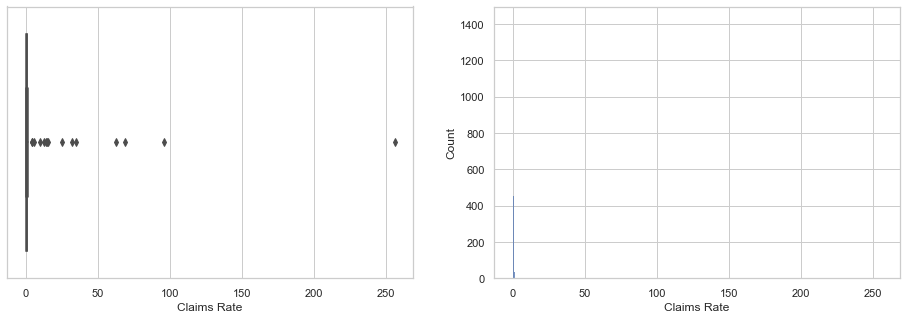

In [78]:
fig, ax =plt.subplots(1,2, figsize =(16,5))
sns.set_theme(style="whitegrid")
sns.boxplot(x=df['Claims Rate'], ax = ax[0])
sns.histplot(data=df, x='Claims Rate',ax = ax[1])
plt.show()

### Premiums in LOB: Motor

𝑃𝑟𝑒𝑚𝑖𝑢𝑚𝑠 − Amount paid by the customer to acquire each policy (product)

In [79]:
df['Premiums in LOB: Motor'].describe()

count    10184.000000
mean       300.394482
std        212.405648
min         -4.110000
25%        190.562500
50%        298.500000
75%        408.300000
max      11604.420000
Name: Premiums in LOB: Motor, dtype: float64

In [80]:
# Número de nulos 
df['Premiums in LOB: Motor'].isna().sum()

31

In [81]:
# Preecher nulos por 0
df['Premiums in LOB: Motor'] = df['Premiums in LOB: Motor'].fillna(0)

# Número de nulos 
df['Premiums in LOB: Motor'].isna().sum()

0

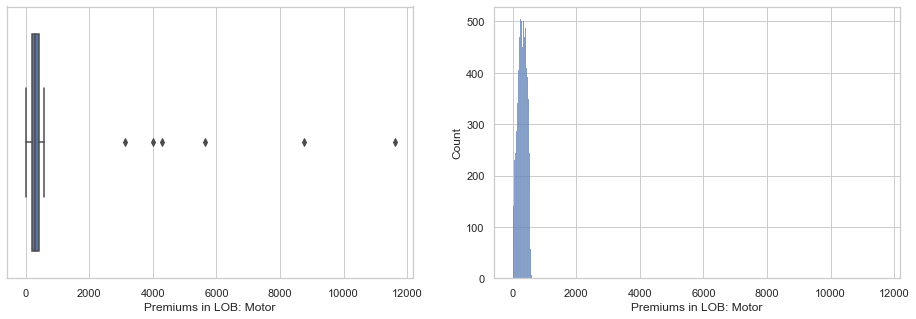

In [82]:
fig, ax =plt.subplots(1,2, figsize =(16,5))
sns.set_theme(style="whitegrid")
sns.boxplot(x=df['Premiums in LOB: Motor'], ax = ax[0])
sns.histplot(data=df, x='Premiums in LOB: Motor',ax = ax[1])
plt.show()

### Premiums in LOB: Household

In [83]:
df['Premiums in LOB: Household'].describe()

count    10215.000000
mean       211.003891
std        353.527718
min        -75.000000
25%         49.450000
50%        133.350000
75%        290.600000
max      25048.800000
Name: Premiums in LOB: Household, dtype: float64

In [84]:
# Número de nulos 
df['Premiums in LOB: Household'].isna().sum()

0

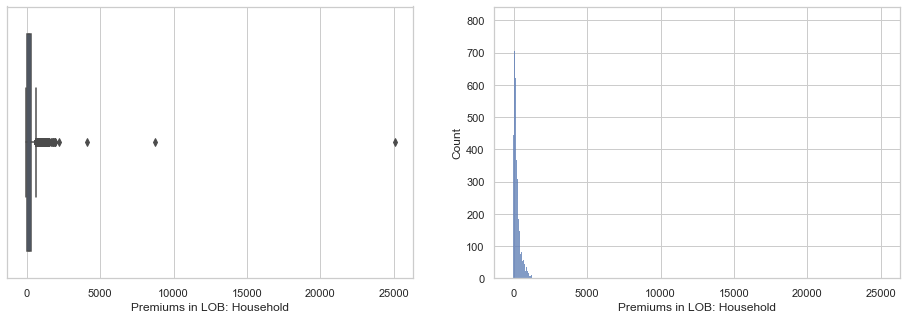

In [85]:
fig, ax =plt.subplots(1,2, figsize =(16,5))
sns.set_theme(style="whitegrid")
sns.boxplot(x=df['Premiums in LOB: Household'], ax = ax[0])
sns.histplot(data=df, x='Premiums in LOB: Household',ax = ax[1])
plt.show()

### Premiums in LOB: Health

In [86]:
df['Premiums in LOB: Health'].describe()

count    10175.000000
mean       171.630005
std        297.479511
min         -2.110000
25%        111.800000
50%        162.810000
75%        219.040000
max      28272.000000
Name: Premiums in LOB: Health, dtype: float64

In [87]:
# Número de nulos 
df['Premiums in LOB: Health'].isna().sum()

40

In [88]:
# Preecher nulos por 0
df['Premiums in LOB: Health'] = df['Premiums in LOB: Health'].fillna(0)

# Número de nulos 
df['Premiums in LOB: Health'].isna().sum()

0

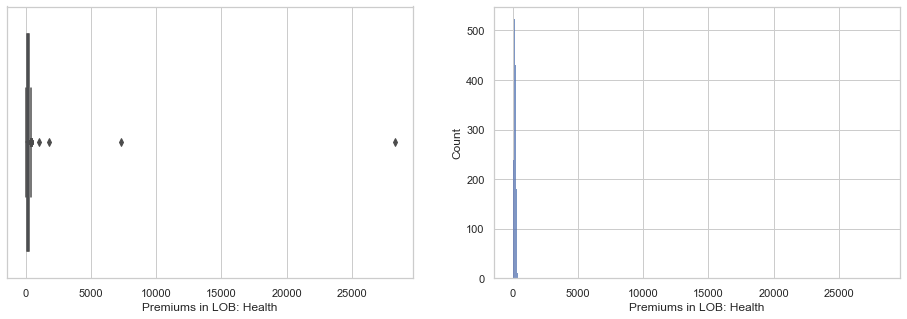

In [89]:
fig, ax =plt.subplots(1,2, figsize =(16,5))
sns.set_theme(style="whitegrid")
sns.boxplot(x=df['Premiums in LOB: Health'], ax = ax[0])
sns.histplot(data=df, x='Premiums in LOB: Health',ax = ax[1])
plt.show()

### Premiums in LOB: Life

In [90]:
df['Premiums in LOB:  Life'].describe()

count    10112.000000
mean        41.883571
std         47.552914
min         -7.000000
25%          9.890000
50%         25.560000
75%         57.790000
max        398.300000
Name: Premiums in LOB:  Life, dtype: float64

In [91]:
# Número de nulos 
df['Premiums in LOB:  Life'].isna().sum()

103

In [92]:
# Preecher nulos por 0
df['Premiums in LOB:  Life'] = df['Premiums in LOB:  Life'].fillna(0)

# Número de nulos 
df['Premiums in LOB:  Life'].isna().sum()

0

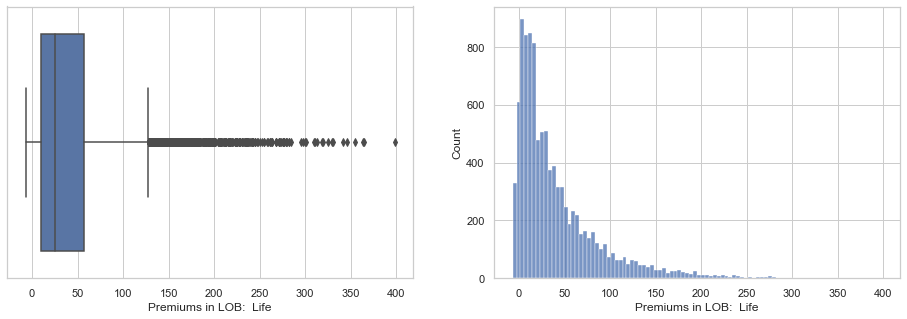

In [93]:
fig, ax =plt.subplots(1,2, figsize =(16,5))
sns.set_theme(style="whitegrid")
sns.boxplot(x=df['Premiums in LOB:  Life'], ax = ax[0])
sns.histplot(data=df, x='Premiums in LOB:  Life',ax = ax[1])
plt.show()

### Premiums in LOB: Work Compensations

In [94]:
df['Premiums in LOB: Work Compensations'].describe()

count    10131.000000
mean        41.297246
std         51.603656
min        -12.000000
25%         10.670000
50%         25.670000
75%         56.790000
max       1988.700000
Name: Premiums in LOB: Work Compensations, dtype: float64

In [95]:
# Número de nulos 
df['Premiums in LOB: Work Compensations'].isna().sum()

84

In [96]:
# Preecher nulos por 0
df['Premiums in LOB: Work Compensations'] = df['Premiums in LOB: Work Compensations'].fillna(0)

# Número de nulos 
df['Premiums in LOB: Work Compensations'].isna().sum()

0

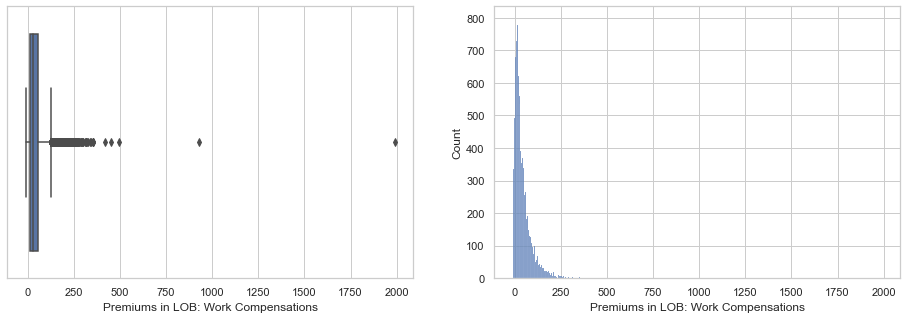

In [97]:
fig, ax =plt.subplots(1,2, figsize =(16,5))
sns.set_theme(style="whitegrid")
sns.boxplot(x=df['Premiums in LOB: Work Compensations'], ax = ax[0])
sns.histplot(data=df, x='Premiums in LOB: Work Compensations',ax = ax[1])
plt.show()

### Scatterplot entre todas as variávies 

In [98]:
# This block of code saves the scatter plot between pairs of features (excluding price) and
# calculates a linear regression. As can be seen, most of the relationships are far from being linear.
df.rename(columns = {'Premiums in LOB: Motor':'Premiums in LOB_Motor', 'Premiums in LOB: Household':'Premiums in LOB_Household',  'Premiums in LOB: Health': 'Premiums in LOB_Health', 'Premiums in LOB:  Life' : 'Premiums in LOB_Life',  'Premiums in LOB: Work Compensations':  'Premiums in LOB_Work Compensations' }, inplace = True)

li = list(df)
# remove as variáveis categóricas
li.remove('Educational Degree')
li.remove('Geographic Living Area')
li.remove('Has Children (Y=1)')

li.remove('First Policy´s Year')

#li.remove('price')
for i in range(len(li) - 1):
    for j in range(i + 1, len(li)):
        
        plt.figure()
        sns.scatterplot(data=df, x=li[i], y=li[j])
        
        plt.xlabel(li[i])
        plt.ylabel(li[j])
        plt.savefig('Figures/features_' + li[i] + '_' + li[j] + '.png', bbox_inches='tight')
        plt.close('all')


### Heatmap

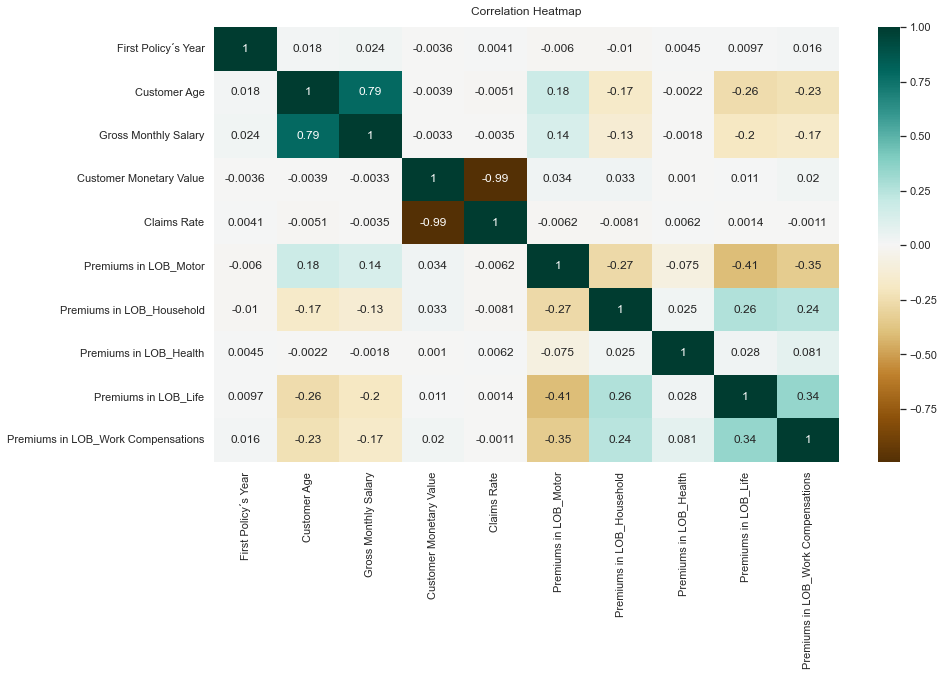

In [99]:
fig = plt.figure(figsize = (14, 8))
heatmap = sns.heatmap(df[['First Policy´s Year', 'Customer Age', 'Gross Monthly Salary', 'Customer Monetary Value', 'Claims Rate', 
                'Premiums in LOB_Motor', 'Premiums in LOB_Household', 'Premiums in LOB_Health','Premiums in LOB_Life', 
                'Premiums in LOB_Work Compensations']].corr(), annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

### Customer Monetary Value vs Claims Rate

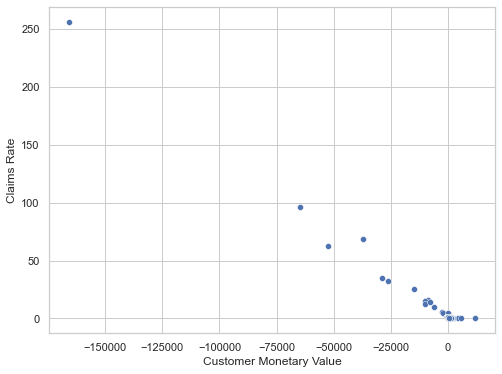

In [100]:
fig = plt.figure(figsize = (8, 6))
sns.scatterplot(data=df, y='Claims Rate', x='Customer Monetary Value')
plt.show()

In [101]:
# remover o outlier
df[df['Claims Rate'] > 100]

,First Policy´s Year,Customer Age,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB_Motor,Premiums in LOB_Household,Premiums in LOB_Health,Premiums in LOB_Life,Premiums in LOB_Work Compensations
Customer Identity,,,,,,,,,,,,,
172,1990.0,27.0,3,2172.0,4.0,1.0,-165680.42,256.2,378.07,78.9,166.81,6.89,18.45


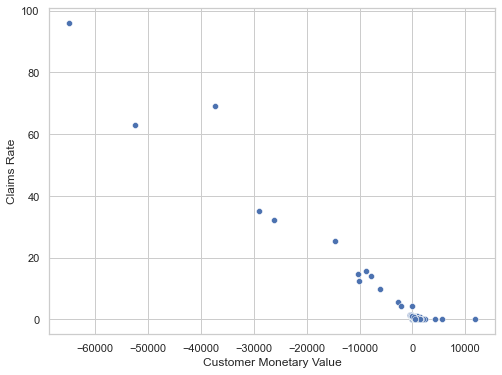

In [102]:
df1 = df.drop(df[df['Claims Rate'] > 100].index)

fig = plt.figure(figsize = (8, 6))
sns.scatterplot(data=df1, y='Claims Rate', x='Customer Monetary Value')
plt.show()

In [103]:
# remover o pontos com Claims Rate elevada
df[df['Claims Rate'] > 2]

,First Policy´s Year,Customer Age,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB_Motor,Premiums in LOB_Household,Premiums in LOB_Health,Premiums in LOB_Life,Premiums in LOB_Work Compensations
Customer Identity,,,,,,,,,,,,,
52,1982.0,50.0,3,6467.0,4.0,1.0,-14714.08,25.36,557.44,20.00,29.56,5.00,-9.00
113,1997.0,37.0,4,4707.0,1.0,1.0,-8719.04,15.65,518.32,4.45,55.90,3.89,10.89
136,1997.0,28.0,3,4352.0,4.0,1.0,-10198.91,14.80,297.61,162.80,143.36,136.47,-3.00
172,1990.0,27.0,3,2172.0,4.0,1.0,-165680.42,256.20,378.07,78.90,166.81,6.89,18.45
656,1974.0,53.0,3,6558.0,3.0,1.0,-64891.00,96.00,410.30,117.25,95.35,37.34,22.56
676,1994.0,79.0,2,8870.0,1.0,0.0,-52382.76,63.00,197.48,280.60,276.94,51.12,38.34
708,1991.0,25.0,3,3267.0,1.0,1.0,-28945.40,35.00,175.70,319.50,294.39,44.12,16.89
759,1988.0,24.0,3,2233.0,1.0,1.0,-10107.37,12.60,193.37,342.85,276.94,8.78,47.23
794,1980.0,33.0,3,2739.0,3.0,1.0,-7851.17,13.90,127.58,48.35,398.41,19.56,12.78


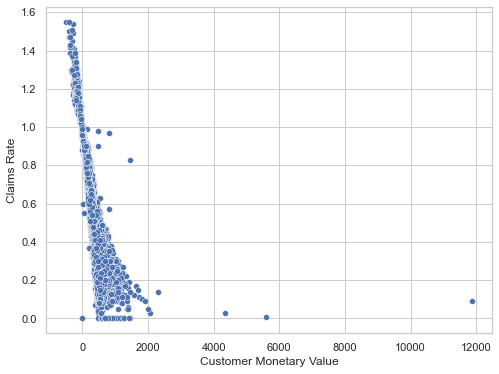

In [104]:
# zoom
df2 = df.drop(df[df['Claims Rate'] > 2].index)

fig = plt.figure(figsize = (8, 6))
sns.scatterplot(data=df2, y='Claims Rate', x='Customer Monetary Value')
plt.show()

### Customer Age vs Claims Rate

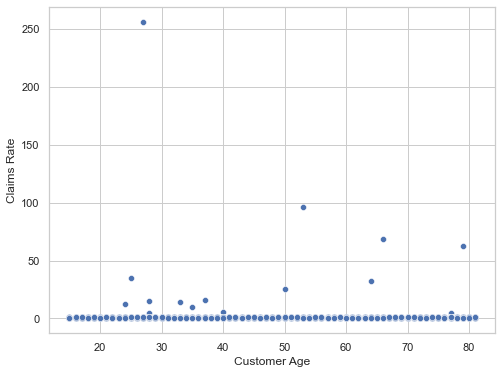

In [105]:
fig = plt.figure(figsize = (8, 6))
sns.scatterplot(data=df, x='Customer Age', y='Claims Rate')
plt.show()

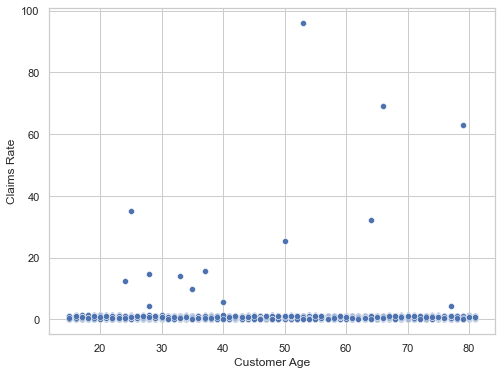

In [106]:
# remover o outlier
df3 = df.drop(df[df['Claims Rate'] > 100].index)

fig = plt.figure(figsize = (8, 6))
sns.scatterplot(data=df3, x='Customer Age', y='Claims Rate')
plt.show()

### First Policy´s Year vs Customer Monetary Value

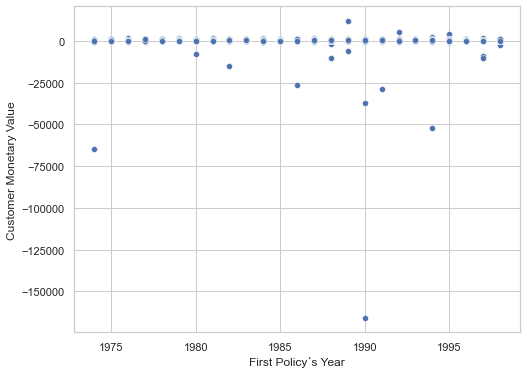

In [107]:
fig = plt.figure(figsize = (8, 6))
sns.scatterplot(data=df, x='First Policy´s Year', y='Customer Monetary Value')
plt.show()

### Comparação entre tipos de seguro

In [108]:

df4 = df[['Premiums in LOB_Motor','Premiums in LOB_Household','Premiums in LOB_Health','Premiums in LOB_Life','Premiums in LOB_Work Compensations']]
df4 = df4.rename(columns={'Premiums in LOB_Motor': 'Motor', 'Premiums in LOB_Household' : "Household",'Premiums in LOB_Health':'Health', 'Premiums in LOB_Life': 'Life', 'Premiums in LOB_Work Compensations':  'Work Compensations' })
df4 = df4.sum()

In [109]:
df4 = pd.DataFrame(df4)
df4.reset_index(inplace=True)
df4

,index,0
0,Motor,3059217.40
1,Household,2155404.75
2,Health,1746335.30
3,Life,423526.67
4,Work Compensations,418382.40


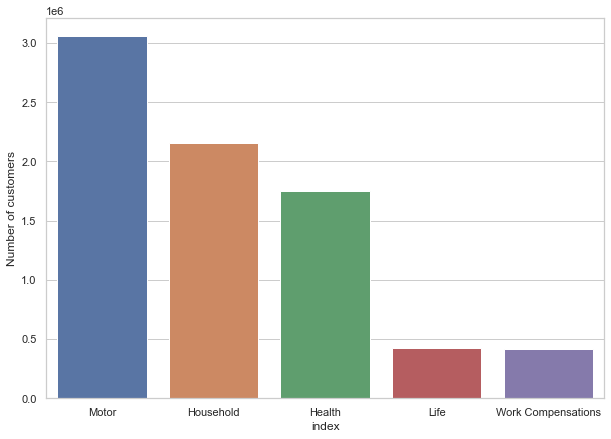

In [110]:
fig = plt.figure(figsize = (10, 7))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="index", y=0, data=df4)
ax.set(ylabel='Number of customers')
plt.show()

#### Has Children (Y=1)

In [111]:
df5 =df.groupby(['Has Children (Y=1)'])['Premiums in LOB_Motor','Premiums in LOB_Household','Premiums in LOB_Health','Premiums in LOB_Life','Premiums in LOB_Work Compensations'].sum()

C:\Users\ANALCI~1\AppData\Local\Temp/ipykernel_25340/343025018.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df5 =df.groupby(['Has Children (Y=1)'])['Premiums in LOB_Motor','Premiums in LOB_Household','Premiums in LOB_Health','Premiums in LOB_Life','Premiums in LOB_Work Compensations'].sum()


In [112]:
df5.reset_index(inplace=True)
df5

,Has Children (Y=1),Premiums in LOB_Motor,Premiums in LOB_Household,Premiums in LOB_Health,Premiums in LOB_Life,Premiums in LOB_Work Compensations
0,0.0,747369.38,736983.95,603108.11,149923.18,143642.93
1,1.0,2311848.02,1418420.80,1143227.19,273603.49,274739.47


In [113]:
df5 = df5.rename(columns={'Premiums in LOB_Motor': 'Motor', 'Premiums in LOB_Household' : "Household",'Premiums in LOB_Health':'Health', 'Premiums in LOB_Life': 'Life', 'Premiums in LOB_Work Compensations':  'Work Compensations' })

df5 = pd.melt(df5,  value_vars=['Motor','Household', 'Health','Life', 'Work Compensations'],id_vars=['Has Children (Y=1)'], col_level=0)

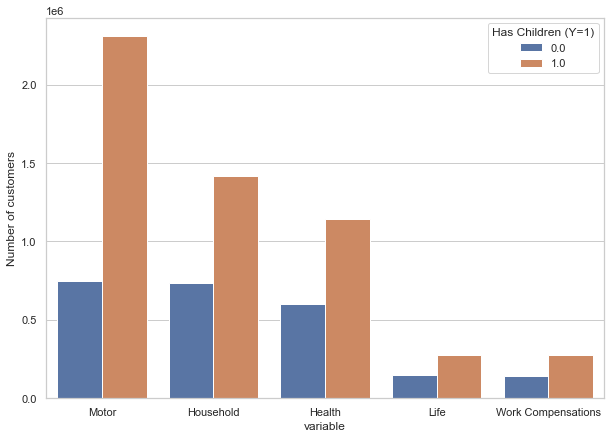

In [114]:
fig = plt.figure(figsize = (10, 7))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="variable", y="value", hue="Has Children (Y=1)", data=df5)
ax.set(ylabel='Number of customers')
plt.show()

In [115]:
df16 = df.rename(columns={'Premiums in LOB_Motor': 'Motor', 'Premiums in LOB_Household' : "Household",'Premiums in LOB_Health':'Health', 'Premiums in LOB_Life': 'Life', 'Premiums in LOB_Work Compensations':  'Work Compensations' })
df16 = pd.melt(df16,  value_vars=['Motor','Household', 'Health','Life', 'Work Compensations'],id_vars=['Has Children (Y=1)'])

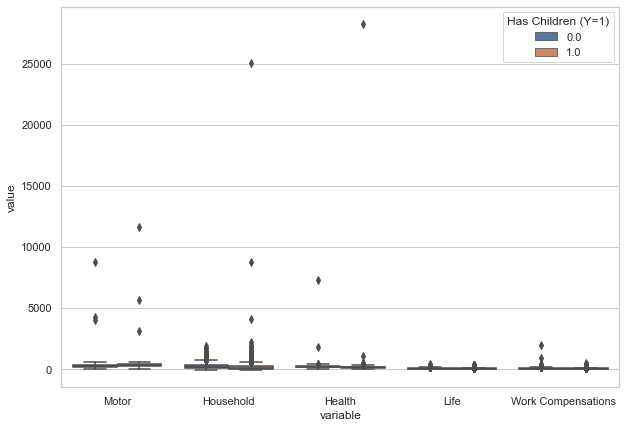

In [116]:
fig = plt.figure(figsize = (10, 7))
sns.set_theme(style="whitegrid")
sns.boxplot(x="variable", y="value", hue="Has Children (Y=1)", data=df16)
plt.show()

In [117]:
# remover outliers
df17 = df.rename(columns={'Premiums in LOB_Motor': 'Motor', 'Premiums in LOB_Household' : "Household",'Premiums in LOB_Health':'Health', 'Premiums in LOB_Life': 'Life', 'Premiums in LOB_Work Compensations':  'Work Compensations' })
df17 = df17.drop(df17[df17['Motor'] > 2500].index)
df17 = df17.drop(df17[df17['Household'] > 2500].index)
df17 = df17.drop(df17[df17['Health'] > 2500].index)
df17 = pd.melt(df17,  value_vars=['Motor','Household', 'Health','Life', 'Work Compensations'],id_vars=['Has Children (Y=1)'])


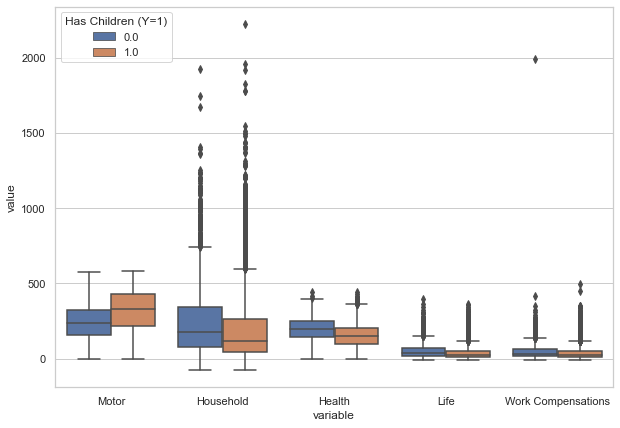

In [118]:
fig = plt.figure(figsize = (10, 7))
sns.set_theme(style="whitegrid")
sns.boxplot(x="variable", y="value", hue="Has Children (Y=1)", data=df17)
plt.show()

#### Educational Degree

In [119]:
df6 =df.groupby(['Educational Degree'])['Premiums in LOB_Motor','Premiums in LOB_Household','Premiums in LOB_Health','Premiums in LOB_Life','Premiums in LOB_Work Compensations'].sum()

C:\Users\ANALCI~1\AppData\Local\Temp/ipykernel_25340/2072335050.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df6 =df.groupby(['Educational Degree'])['Premiums in LOB_Motor','Premiums in LOB_Household','Premiums in LOB_Health','Premiums in LOB_Life','Premiums in LOB_Work Compensations'].sum()


In [120]:
df6.reset_index(inplace=True)
df6 = df6.rename(columns={'Premiums in LOB_Motor': 'Motor', 'Premiums in LOB_Household' : "Household",'Premiums in LOB_Health':'Health', 'Premiums in LOB_Life': 'Life', 'Premiums in LOB_Work Compensations':  'Work Compensations' })

df6

,Educational Degree,Motor,Household,Health,Life,Work Compensations
0,1,214738.30,545392.15,203419.66,109380.99,108139.83
1,2,913987.65,900552.05,649751.77,178027.36,173852.36
2,3,1655477.54,658579.50,793441.34,125612.68,125847.15
3,4,275013.91,50881.05,99722.53,10505.64,10543.06


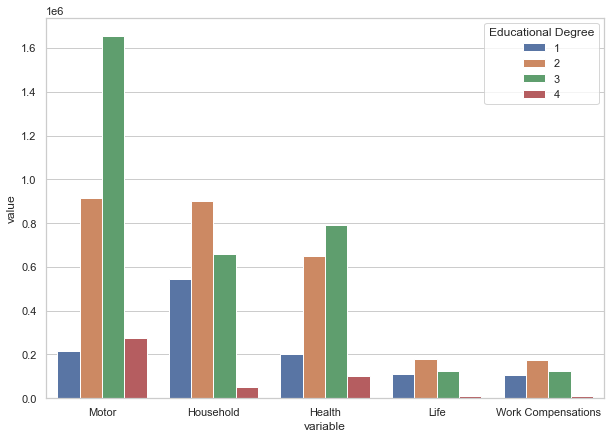

In [121]:
df6 = pd.melt(df6,  value_vars=['Motor','Household', 'Health','Life', 'Work Compensations'],id_vars=['Educational Degree'], col_level=0)

fig = plt.figure(figsize = (10, 7))
sns.set_theme(style="whitegrid")
sns.barplot(x="variable", y="value", hue='Educational Degree', data=df6)
plt.show()

In [122]:
df18 = df.rename(columns={'Premiums in LOB_Motor': 'Motor', 'Premiums in LOB_Household' : "Household",'Premiums in LOB_Health':'Health', 'Premiums in LOB_Life': 'Life', 'Premiums in LOB_Work Compensations':  'Work Compensations' })
df18 = pd.melt(df18,  value_vars=['Motor','Household', 'Health','Life', 'Work Compensations'],id_vars=['Educational Degree'])

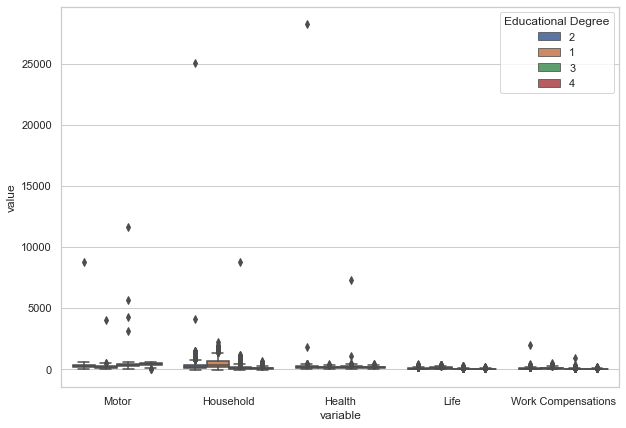

In [123]:
fig = plt.figure(figsize = (10, 7))
sns.set_theme(style="whitegrid")
sns.boxplot(x="variable", y="value", hue="Educational Degree", data=df18)
plt.show()

In [124]:
# remover outliers
df19 = df.rename(columns={'Premiums in LOB_Motor': 'Motor', 'Premiums in LOB_Household' : "Household",'Premiums in LOB_Health':'Health', 'Premiums in LOB_Life': 'Life', 'Premiums in LOB_Work Compensations':  'Work Compensations' })
df19 = df19.drop(df19[df19['Motor'] > 2500].index)
df19 = df19.drop(df19[df19['Household'] > 2500].index)
df19 = df19.drop(df19[df19['Health'] > 2500].index)
df19 = pd.melt(df19,  value_vars=['Motor','Household', 'Health','Life', 'Work Compensations'],id_vars=['Educational Degree'])

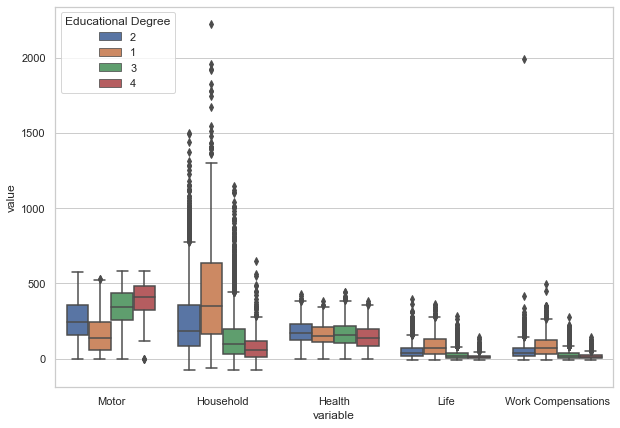

In [125]:
fig = plt.figure(figsize = (10, 7))
sns.set_theme(style="whitegrid")
sns.boxplot(x="variable", y="value", hue="Educational Degree", data=df19)
plt.show()

#### Geographic Living Area

In [126]:
df7 =df.groupby(['Geographic Living Area'])['Premiums in LOB_Motor','Premiums in LOB_Household','Premiums in LOB_Health','Premiums in LOB_Life','Premiums in LOB_Work Compensations'].sum()

C:\Users\ANALCI~1\AppData\Local\Temp/ipykernel_25340/3277207012.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df7 =df.groupby(['Geographic Living Area'])['Premiums in LOB_Motor','Premiums in LOB_Household','Premiums in LOB_Health','Premiums in LOB_Life','Premiums in LOB_Work Compensations'].sum()


In [127]:
df7.reset_index(inplace=True)
df7['Geographic Living Area'] = df7['Geographic Living Area'].astype(int)
df7 = df7.rename(columns={'Premiums in LOB_Motor': 'Motor', 'Premiums in LOB_Household' : "Household",'Premiums in LOB_Health':'Health', 'Premiums in LOB_Life': 'Life', 'Premiums in LOB_Work Compensations':  'Work Compensations' })
df7

,Geographic Living Area,Motor,Household,Health,Life,Work Compensations
0,1,893909.66,626803.75,505967.67,124267.62,122685.72
1,2,305852.15,211060.10,169768.96,40567.32,40705.07
2,3,639337.41,423061.40,377602.37,83687.19,87560.97
3,4,1220118.18,894479.50,692996.30,175004.54,167430.64


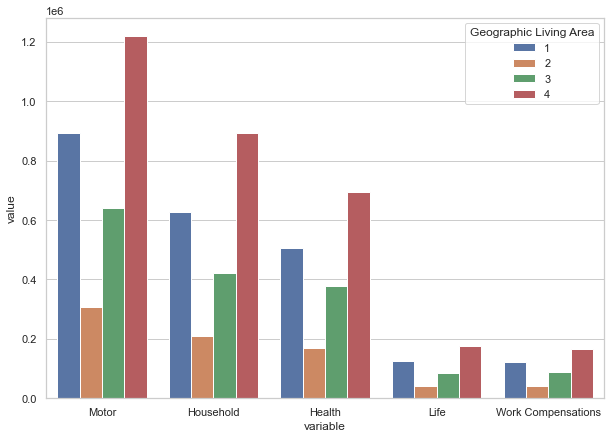

In [128]:
df7 = pd.melt(df7,  value_vars=['Motor','Household', 'Health','Life', 'Work Compensations'],id_vars=['Geographic Living Area'], col_level=0)

fig = plt.figure(figsize = (10, 7))
sns.set_theme(style="whitegrid")
sns.barplot(x="variable", y="value", hue='Geographic Living Area', data=df7)
plt.show()

#### Customer Age

Nova variável categórica para a idade:

1: < 19

2: 20-29

3: 30-39

4: 40-49

5: 50-59

6: 60-69

7: 70-79

8: 80-89


In [129]:
df8 = df.copy()
age_group = pd.cut(df8['Customer Age'],bins=[0,19,29,39,49,59,69,79,89],labels=['[<18]','[18-25]','[25-40]','[40-60]','5','6','7','8'])
df8.insert(2, 'Age Group',age_group)

In [130]:
# Dataframe com as contagens do 'Age Group'
df_age_count = pd.DataFrame(df8.groupby('Age Group')['Age Group'].count())
df_age_count = df_age_count.rename(columns={'Age Group': 'count'})
df_age_count.reset_index(inplace= True)
df_age_count

,Age Group,count
0,1,342
1,2,1624
2,3,1710
3,4,1663
4,5,1739
5,6,1747
6,7,1339
7,8,51


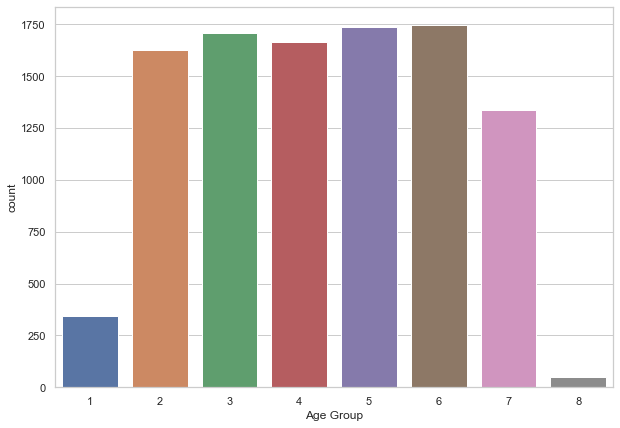

In [131]:
fig = plt.figure(figsize = (10, 7))
sns.set_theme(style="whitegrid")
sns.barplot(x="Age Group", y='count', data=df_age_count)
plt.show()

In [132]:
df9 =df8.groupby(['Age Group'])['Premiums in LOB_Motor','Premiums in LOB_Household','Premiums in LOB_Health','Premiums in LOB_Life','Premiums in LOB_Work Compensations'].sum()

C:\Users\ANALCI~1\AppData\Local\Temp/ipykernel_25340/453864930.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df9 =df8.groupby(['Age Group'])['Premiums in LOB_Motor','Premiums in LOB_Household','Premiums in LOB_Health','Premiums in LOB_Life','Premiums in LOB_Work Compensations'].sum()


In [133]:
df9 = df9.transpose()
df9 = pd.DataFrame(df9.sum())
df9.reset_index(inplace=True)
df9

,Age Group,0
0,1,372695.23
1,2,1459037.26
2,3,1228399.34
3,4,1131289.89
4,5,1243755.24
5,6,1314423.27
6,7,1015939.50
7,8,37326.79


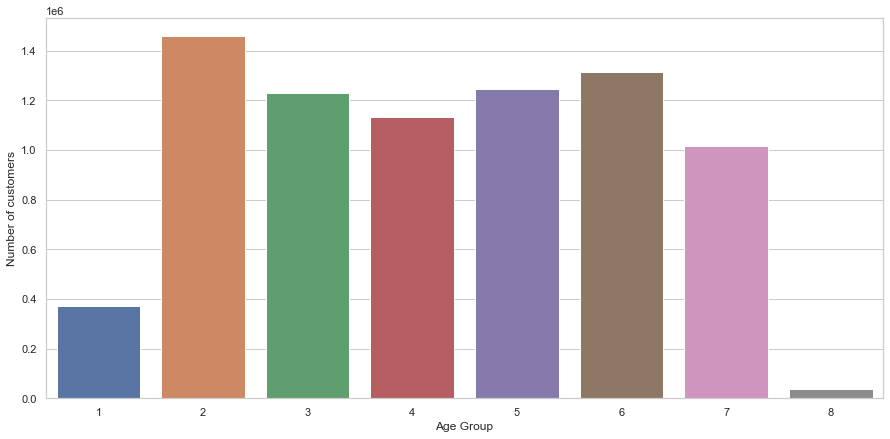

In [134]:
fig = plt.figure(figsize = (15, 7))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Age Group", y=0, data=df9)
ax.set(ylabel='Number of customers')
plt.show()

#### Gross Monthly Salary

Nova variável categórica para a idade:

1: < 1000

2: 1000 - 2999

3: 3000 - 4999

4: 5000 - 6999

5: 7000 - 9999

6: > 10 000


In [135]:
df10 = df.copy()
salary_group = pd.cut(df10['Gross Monthly Salary'],bins=[0,1000,2999,4999,6999,9999,999999],labels=['1','2','3','4','5','6'])
df10.insert(4, 'Salary Group',salary_group)

In [136]:
# Dataframe com as contagens do 'Salary Group'
df_salary_count = pd.DataFrame(df10.groupby('Salary Group')['Salary Group'].count())
df_salary_count = df_salary_count.rename(columns={'Salary Group': 'count'})
df_salary_count.reset_index(inplace= True)
df_salary_count

,Salary Group,count
0,1,73
1,2,1854
2,3,3180
3,4,3196
4,5,1909
5,6,3


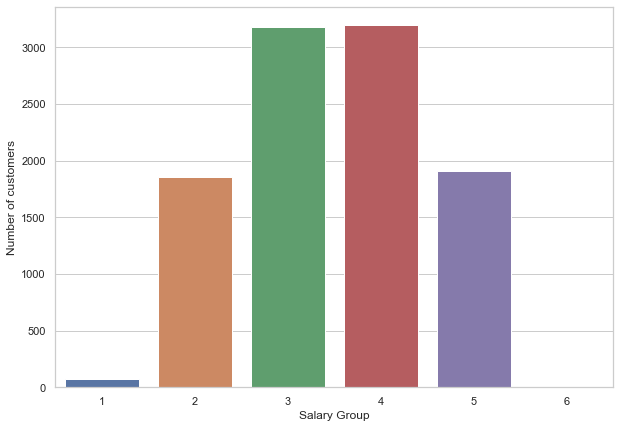

In [137]:
fig = plt.figure(figsize = (10, 7))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Salary Group", y='count', data=df_salary_count)
ax.set(ylabel='Number of customers')
plt.show()

In [138]:
df11 =df10.groupby(['Salary Group'])['Premiums in LOB_Motor','Premiums in LOB_Household','Premiums in LOB_Health','Premiums in LOB_Life','Premiums in LOB_Work Compensations'].sum()

C:\Users\ANALCI~1\AppData\Local\Temp/ipykernel_25340/2366183424.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df11 =df10.groupby(['Salary Group'])['Premiums in LOB_Motor','Premiums in LOB_Household','Premiums in LOB_Health','Premiums in LOB_Life','Premiums in LOB_Work Compensations'].sum()


In [139]:
df11 = df11.transpose()
df11 = pd.DataFrame(df11.sum())
df11.reset_index(inplace=True)
df11

,Salary Group,0
0,1,76458.95
1,2,1684380.54
2,3,2259276.74
3,4,2320253.39
4,5,1460094.02
5,6,2402.88


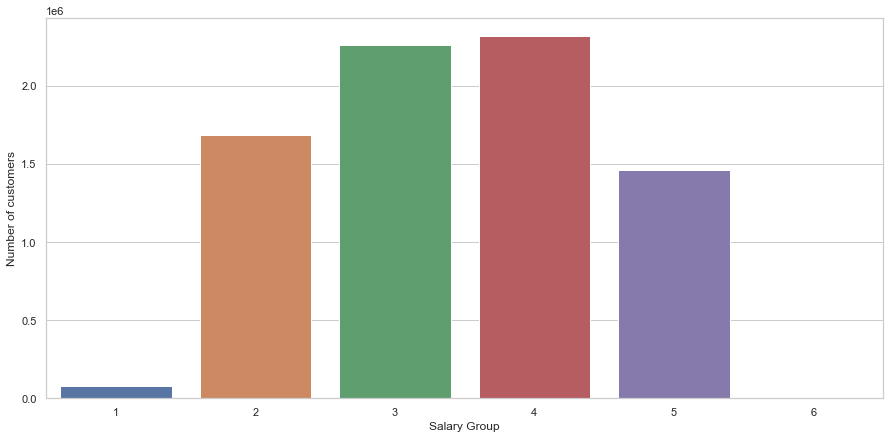

In [140]:
fig = plt.figure(figsize = (15, 7))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Salary Group", y=0, data=df11)
ax.set(ylabel='Number of customers')
plt.show()

### Tipos de seguro vs Customer Age
#### MOTOR

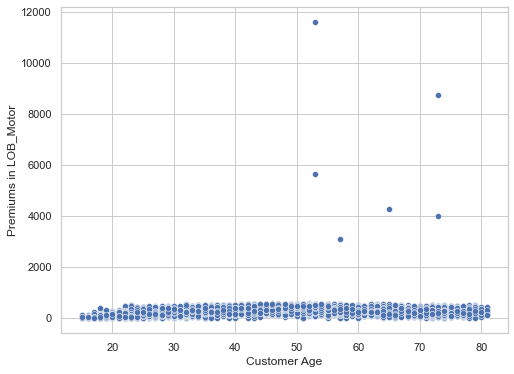

In [141]:
fig = plt.figure(figsize = (8, 6))
sns.scatterplot(data=df, y='Premiums in LOB_Motor', x='Customer Age')
plt.show()

In [142]:
# remover outliers
df[df['Premiums in LOB_Motor'] > 2000]

,First Policy´s Year,Customer Age,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB_Motor,Premiums in LOB_Household,Premiums in LOB_Health,Premiums in LOB_Life,Premiums in LOB_Work Compensations
Customer Identity,,,,,,,,,,,,,
5129,1996.0,73.0,1,7526.0,1.0,0.0,466.21,0.90,4003.44,612.90,137.36,121.69,31.34
5212,1981.0,73.0,2,8269.0,3.0,0.0,130.14,0.99,8744.61,101.70,1767.00,155.14,130.58
5294,1989.0,53.0,3,7128.0,3.0,1.0,11875.89,0.09,11604.42,48.90,1045.52,103.13,296.47
6702,1995.0,65.0,3,5894.0,4.0,0.0,4328.50,0.03,4273.49,83.90,105.13,3.00,3.89
7086,1992.0,53.0,3,4919.0,3.0,1.0,5596.84,0.01,5645.50,-25.55,49.01,1.89,1.89
7905,1974.0,57.0,3,4707.0,4.0,1.0,-46.89,1.01,3106.62,30.00,59.01,12.89,9.00


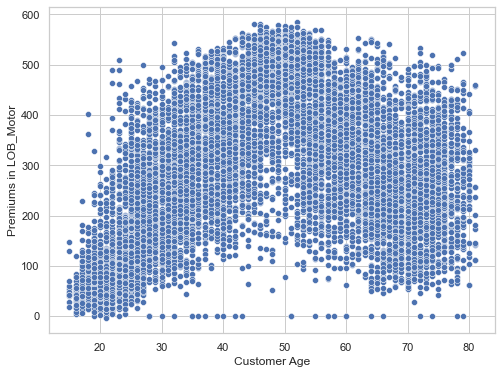

In [143]:
df12 = df.drop(df[df['Premiums in LOB_Motor'] > 2000].index)

fig = plt.figure(figsize = (8, 6))
sns.scatterplot(data=df12, y='Premiums in LOB_Motor', x='Customer Age')
plt.show()

#### HOUSEHOLD

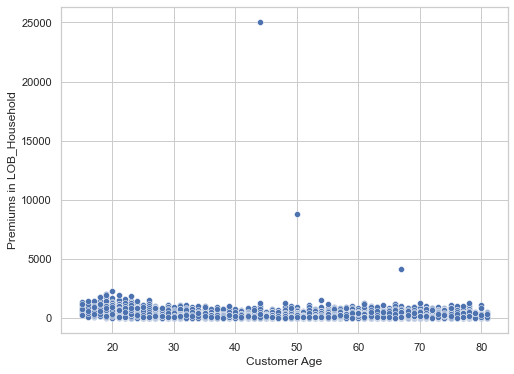

In [144]:
fig = plt.figure(figsize = (8, 6))
sns.scatterplot(data=df, y='Premiums in LOB_Household', x='Customer Age')
plt.show()

In [145]:
# remover outliers
df[df['Premiums in LOB_Household'] > 3000]

,First Policy´s Year,Customer Age,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB_Motor,Premiums in LOB_Household,Premiums in LOB_Health,Premiums in LOB_Life,Premiums in LOB_Work Compensations
Customer Identity,,,,,,,,,,,,,
6344,1981.0,67.0,2,5283.0,2.0,1.0,0.78,0.99,424.19,4130.7,118.69,15.67,41.45
6836,1975.0,50.0,3,5663.0,4.0,1.0,-31.00,1.00,535.10,8762.8,41.12,-6.00,9.78
8867,1978.0,44.0,2,5236.0,4.0,1.0,473.54,0.98,508.43,25048.8,36.23,9.89,11.89


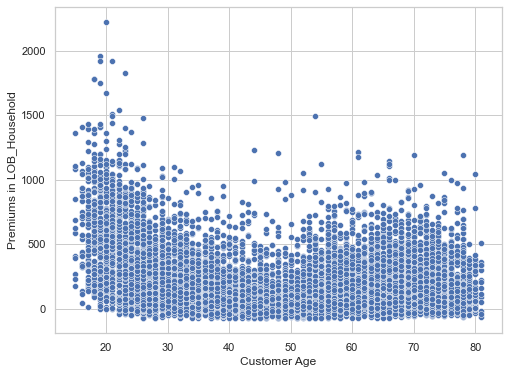

In [146]:
df13 = df.drop(df[df['Premiums in LOB_Household'] > 3000].index)

fig = plt.figure(figsize = (8, 6))
sns.scatterplot(data=df13, y='Premiums in LOB_Household', x='Customer Age')
plt.show()

#### HEALTH

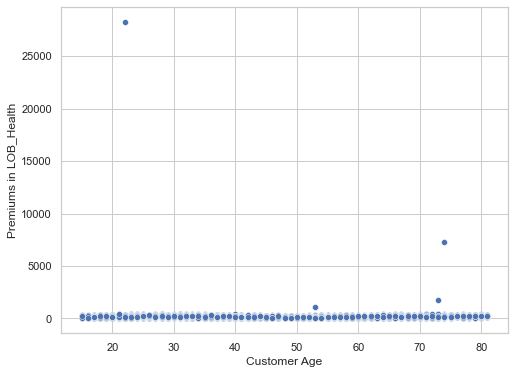

In [147]:
fig = plt.figure(figsize = (8, 6))
sns.scatterplot(data=df, y='Premiums in LOB_Health', x='Customer Age')
plt.show()

In [148]:
# remover outliers
df[df['Premiums in LOB_Health'] > 1000]

,First Policy´s Year,Customer Age,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB_Motor,Premiums in LOB_Household,Premiums in LOB_Health,Premiums in LOB_Life,Premiums in LOB_Work Compensations
Customer Identity,,,,,,,,,,,,,
5212,1981.0,73.0,2,8269.0,3.0,0.0,130.14,0.99,8744.61,101.70,1767.00,155.14,130.58
5294,1989.0,53.0,3,7128.0,3.0,1.0,11875.89,0.09,11604.42,48.90,1045.52,103.13,296.47
7962,1995.0,74.0,3,8003.0,3.0,0.0,1457.99,0.83,431.86,107.80,7322.48,12.89,930.44
9150,1985.0,22.0,2,1974.0,3.0,1.0,804.05,0.97,26.34,829.05,28272.00,65.68,138.25


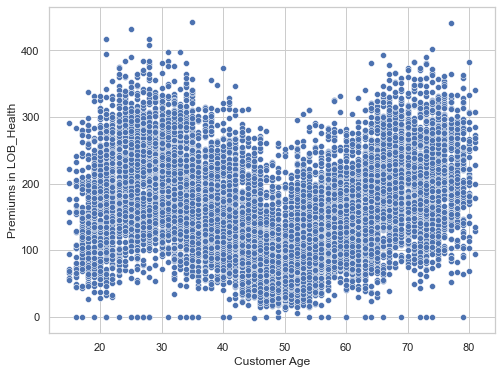

In [149]:
df14 = df.drop(df[df['Premiums in LOB_Health'] > 1000].index)

fig = plt.figure(figsize = (8, 6))
sns.scatterplot(data=df14, y='Premiums in LOB_Health', x='Customer Age')
plt.show()

#### LIFE

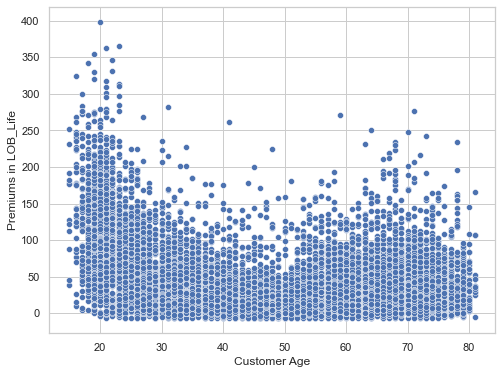

In [150]:
fig = plt.figure(figsize = (8, 6))
sns.scatterplot(data=df, y='Premiums in LOB_Life', x='Customer Age')
plt.show()

#### WORK COMPENSATIONS

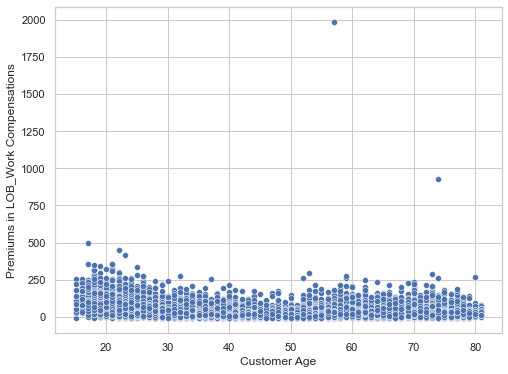

In [151]:
fig = plt.figure(figsize = (8, 6))
sns.scatterplot(data=df, y='Premiums in LOB_Work Compensations', x='Customer Age')
plt.show()

In [152]:
# remover outliers
df[df['Premiums in LOB_Work Compensations'] > 750]

,First Policy´s Year,Customer Age,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB_Motor,Premiums in LOB_Household,Premiums in LOB_Health,Premiums in LOB_Life,Premiums in LOB_Work Compensations
Customer Identity,,,,,,,,,,,,,
5085,1994.0,57.0,2,6659.0,3.0,0.0,2314.21,0.14,350.51,201.7,125.80,39.23,1988.70
7962,1995.0,74.0,3,8003.0,3.0,0.0,1457.99,0.83,431.86,107.8,7322.48,12.89,930.44


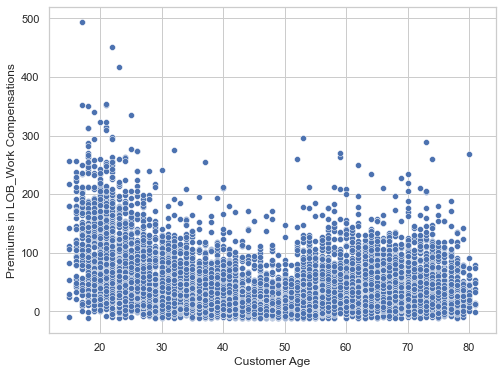

In [153]:
df15 = df.drop(df[df['Premiums in LOB_Work Compensations'] > 750].index)

fig = plt.figure(figsize = (8, 6))
sns.scatterplot(data=df15, y='Premiums in LOB_Work Compensations', x='Customer Age')
plt.show()

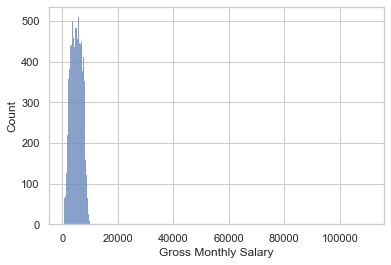

In [154]:
sns.histplot(df['Gross Monthly Salary'])
plt.show()

## Identificar outliers usando o z- score (univariado)

### Gross Monthly Salary

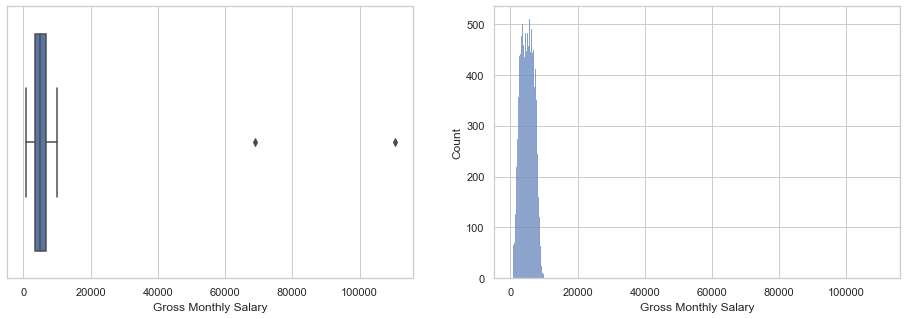

In [155]:
fig, ax =plt.subplots(1,2, figsize =(16,5))
sns.set_theme(style="whitegrid")
sns.boxplot(x=df['Gross Monthly Salary'], ax = ax[0])
sns.histplot(data=df, x='Gross Monthly Salary',ax = ax[1])
plt.show()

In [156]:
# z-score
data =df['Gross Monthly Salary']
# calculate mean
mean = np.mean(data) 
# calculate standard deviation
sd = np.std(data)
# determine a threhold
threshold = 3
# create empty list to store outliers
outliers = []
# detect outlier
for i in data: 
    z = (i-mean)/sd # calculate z-score
    if abs(z) > threshold:  # identify outliers
        outliers.append(i) # add to the empty list
# print outliers    
print("The detected outliers are: ", outliers)

The detected outliers are:  [110430.0, 68981.0]


In [157]:
df[df['Gross Monthly Salary'].isin(outliers)]

,First Policy´s Year,Customer Age,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB_Motor,Premiums in LOB_Household,Premiums in LOB_Health,Premiums in LOB_Life,Premiums in LOB_Work Compensations
Customer Identity,,,,,,,,,,,,,
5883,1995.0,60.0,2,110430.0,4.0,1.0,122.25,0.79,281.83,147.25,130.58,84.46,66.68
8262,1981.0,25.0,2,68981.0,4.0,0.0,608.89,0.28,57.01,358.95,195.26,113.80,161.14


In [158]:
# remover outliers do dataset
df_out = df.drop(df[df['Gross Monthly Salary'].isin(outliers)].index)

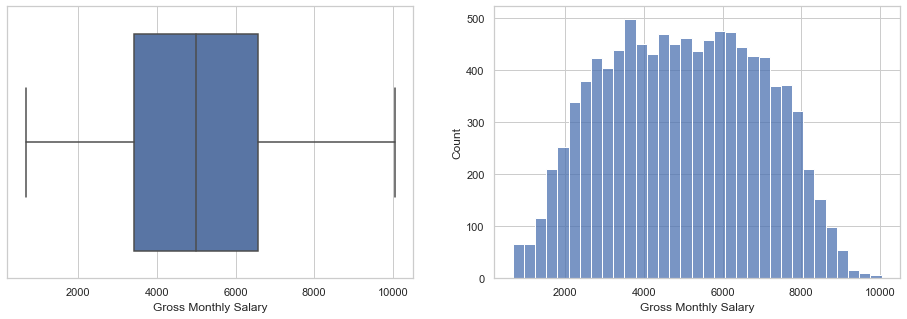

In [159]:
fig, ax =plt.subplots(1,2, figsize =(16,5))
sns.set_theme(style="whitegrid")
sns.boxplot(x=df_out['Gross Monthly Salary'], ax = ax[0])
sns.histplot(data=df_out, x='Gross Monthly Salary',ax = ax[1])
plt.show()

### Customer Monetary Value

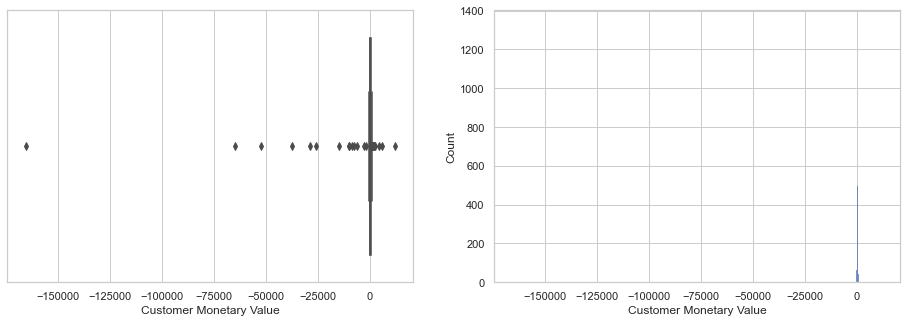

In [160]:
fig, ax =plt.subplots(1,2, figsize =(16,5))
sns.set_theme(style="whitegrid")
sns.boxplot(x=df_out['Customer Monetary Value'], ax = ax[0])
sns.histplot(data=df_out, x='Customer Monetary Value',ax = ax[1])
plt.show()

In [161]:
# z-score
data =df_out['Customer Monetary Value']
# calculate mean
mean = np.mean(data) 
# calculate standard deviation
sd = np.std(data)
# determine a threhold
threshold = 3
# create empty list to store outliers
outliers = []
# detect outlier
for i in data: 
    z = (i-mean)/sd # calculate z-score
    if abs(z) > threshold:  # identify outliers
        outliers.append(i) # add to the empty list
# print outliers    
print("The detected outliers are: ", outliers)

The detected outliers are:  [-14714.08, -8719.04, -10198.91, -165680.42, -64891.0, -52382.76, -28945.4, -10107.37, -7851.17, -26130.45, -6115.85, 11875.89, -37327.08]


In [162]:
df_out[df_out['Customer Monetary Value']== min(outliers)]

,First Policy´s Year,Customer Age,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB_Motor,Premiums in LOB_Household,Premiums in LOB_Health,Premiums in LOB_Life,Premiums in LOB_Work Compensations
Customer Identity,,,,,,,,,,,,,
172,1990.0,27.0,3,2172.0,4.0,1.0,-165680.42,256.2,378.07,78.9,166.81,6.89,18.45


In [163]:
# remover outlier do dataset
df_out = df_out.drop(df_out[df_out['Customer Monetary Value'].isin(outliers)].index)

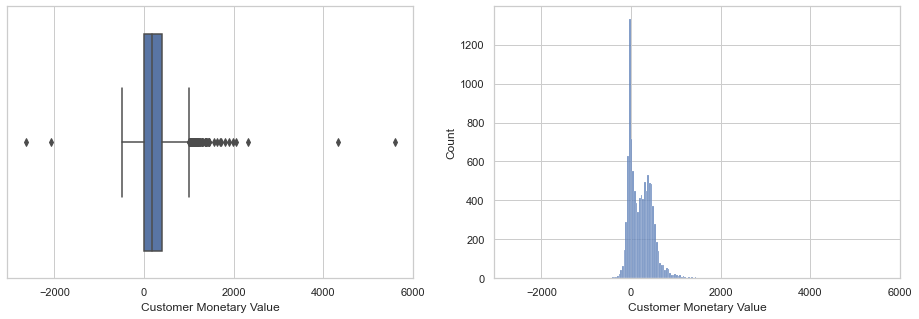

In [164]:
fig, ax =plt.subplots(1,2, figsize =(16,5))
sns.set_theme(style="whitegrid")
sns.boxplot(x=df_out['Customer Monetary Value'], ax = ax[0])
sns.histplot(data=df_out, x='Customer Monetary Value',ax = ax[1])
plt.show()

In [165]:
# Testar fazer o score com os dados padronizados

### Claims Rate

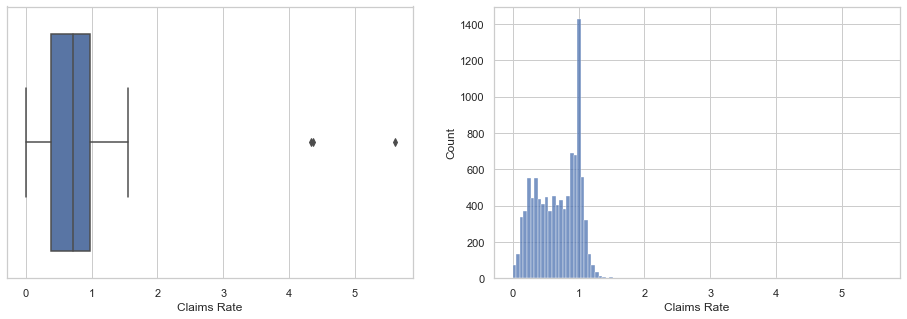

In [166]:
fig, ax =plt.subplots(1,2, figsize =(16,5))
sns.set_theme(style="whitegrid")
sns.boxplot(x=df_out['Claims Rate'], ax = ax[0])
sns.histplot(data=df_out, x='Claims Rate',ax = ax[1])
plt.show()

In [167]:
# z-score
data =df_out['Claims Rate']
# calculate mean
mean = np.mean(data) 
# calculate standard deviation
sd = np.std(data)
# determine a threhold
threshold = 3
# create empty list to store outliers
outliers = []
# detect outlier
for i in data: 
    z = (i-mean)/sd # calculate z-score
    if abs(z) > threshold:  # identify outliers
        outliers.append(i) # add to the empty list
# print outliers    
print("The detected outliers are: ", outliers)

The detected outliers are:  [5.6, 4.36, 4.33]


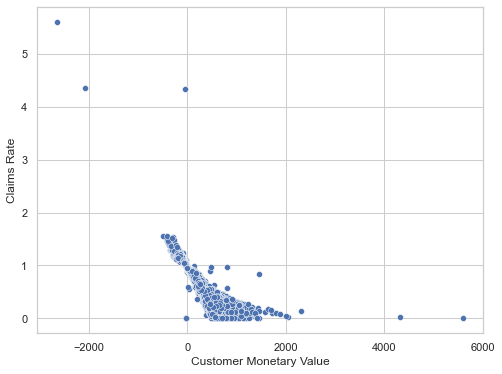

In [168]:
fig = plt.figure(figsize = (8, 6))
sns.scatterplot(data=df_out, y='Claims Rate', x='Customer Monetary Value')
plt.show()

In [169]:
# remover outlier do dataset
df_out = df_out.drop(df_out[df_out['Claims Rate'].isin(outliers)].index)

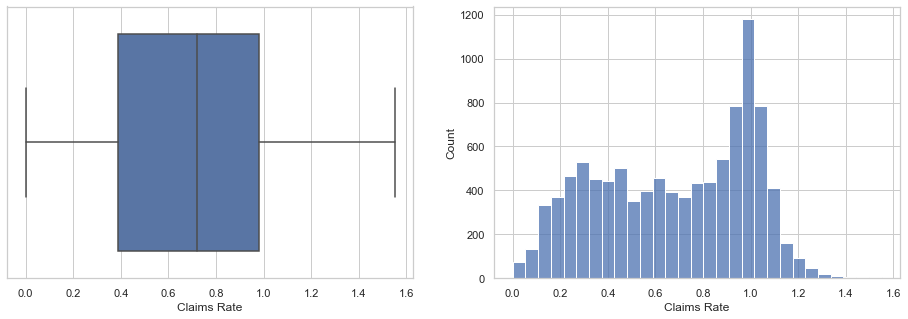

In [170]:
fig, ax =plt.subplots(1,2, figsize =(16,5))
sns.set_theme(style="whitegrid")
sns.boxplot(x=df_out['Claims Rate'], ax = ax[0])
sns.histplot(data=df_out, x='Claims Rate',ax = ax[1])
plt.show()

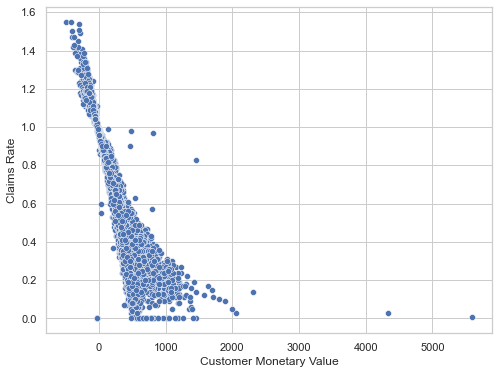

In [171]:
fig = plt.figure(figsize = (8, 6))
sns.scatterplot(data=df_out, y='Claims Rate', x='Customer Monetary Value')
plt.show()

### Premiums in LOB_Motor

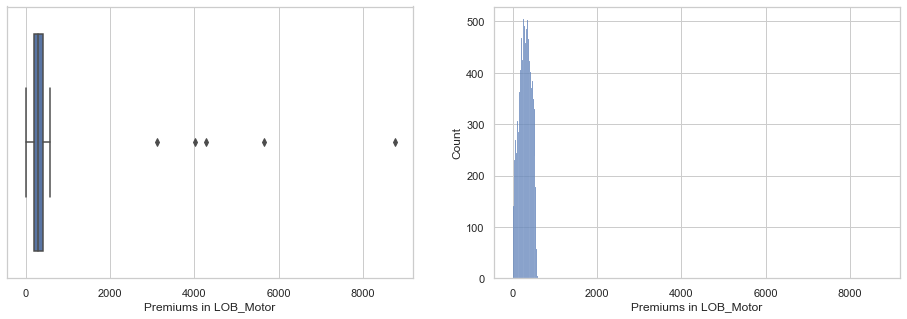

In [172]:
fig, ax =plt.subplots(1,2, figsize =(16,5))
sns.set_theme(style="whitegrid")
sns.boxplot(x=df_out['Premiums in LOB_Motor'], ax = ax[0])
sns.histplot(data=df_out, x='Premiums in LOB_Motor',ax = ax[1])
plt.show()

In [173]:
# z-score
data =df_out['Premiums in LOB_Motor']
# calculate mean
mean = np.mean(data) 
# calculate standard deviation
sd = np.std(data)
# determine a threhold
threshold = 3
# create empty list to store outliers
outliers = []
# detect outlier
for i in data: 
    z = (i-mean)/sd # calculate z-score
    if abs(z) > threshold:  # identify outliers
        outliers.append(i) # add to the empty list
# print outliers    
print("The detected outliers are: ", outliers)

The detected outliers are:  [4003.44, 8744.61, 4273.49, 5645.5, 3106.62]


In [174]:
# remover outliers do dataset
df_out = df_out.drop(df_out[df_out['Premiums in LOB_Motor'].isin(outliers)].index)

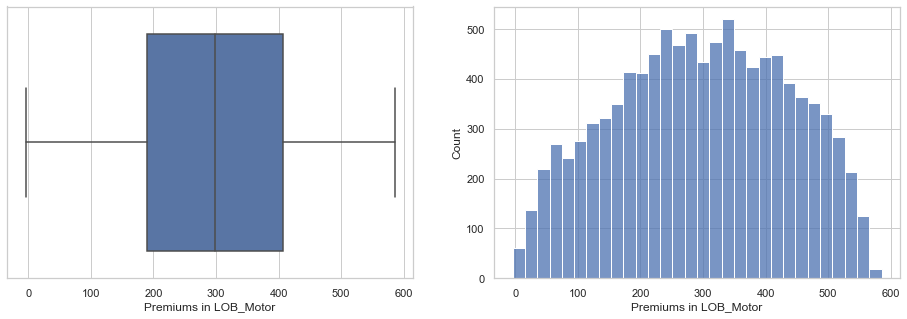

In [175]:
fig, ax =plt.subplots(1,2, figsize =(16,5))
sns.set_theme(style="whitegrid")
sns.boxplot(x=df_out['Premiums in LOB_Motor'], ax = ax[0])
sns.histplot(data=df_out, x='Premiums in LOB_Motor',ax = ax[1])
plt.show()

### Premiums in LOB_Household

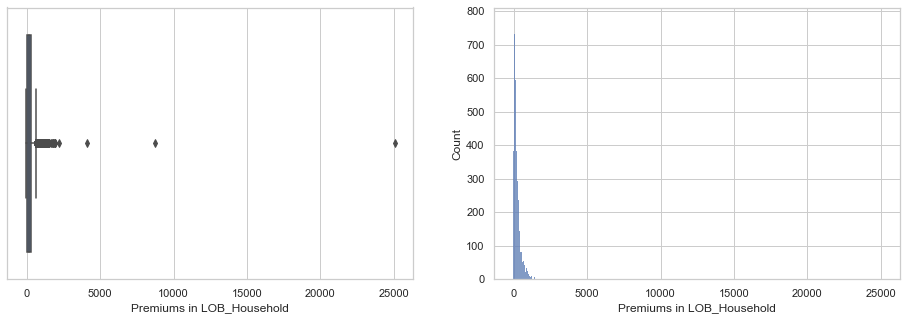

In [176]:
fig, ax =plt.subplots(1,2, figsize =(16,5))
sns.set_theme(style="whitegrid")
sns.boxplot(x=df_out['Premiums in LOB_Household'], ax = ax[0])
sns.histplot(data=df_out, x='Premiums in LOB_Household',ax = ax[1])
plt.show()

In [177]:
# z-score
data =df_out['Premiums in LOB_Household']
# calculate mean
mean = np.mean(data) 
# calculate standard deviation
sd = np.std(data)
# determine a threhold
threshold = 3
# create empty list to store outliers
outliers = []
# detect outlier
for i in data: 
    z = (i-mean)/sd # calculate z-score
    if abs(z) > threshold:  # identify outliers
        outliers.append(i) # add to the empty list
# print outliers    
print("The detected outliers are: ", outliers)

The detected outliers are:  [1363.6, 1286.9, 1777.55, 1364.15, 1673.1, 1957.6, 1513.05, 1277.45, 1300.25, 1439.15, 1310.8, 1478.6, 1404.7, 1498.05, 1280.8, 1826.45, 1359.15, 1544.75, 1393.6, 4130.7, 1491.95, 1409.7, 1748.1, 8762.8, 1294.7, 1409.15, 1918.15, 2223.75, 1394.7, 1924.25, 1432.5, 25048.8, 1777.55, 1434.15, 1374.15, 1409.15]


In [178]:
# remover outlier do dataset
df_out = df_out.drop(df_out[df_out['Premiums in LOB_Household'].isin(outliers)].index)

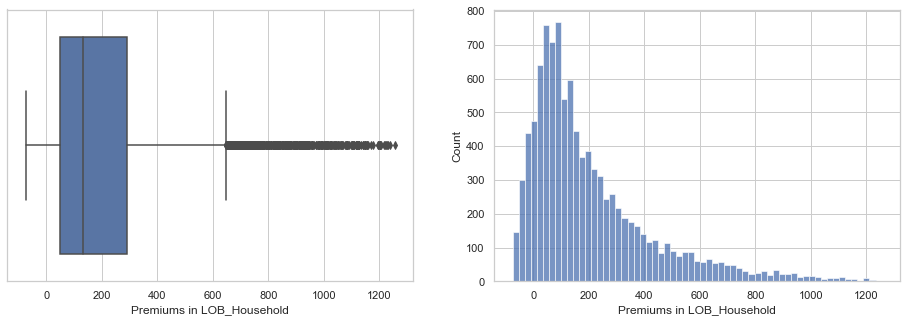

In [179]:
fig, ax =plt.subplots(1,2, figsize =(16,5))
sns.set_theme(style="whitegrid")
sns.boxplot(x=df_out['Premiums in LOB_Household'], ax = ax[0])
sns.histplot(data=df_out, x='Premiums in LOB_Household',ax = ax[1])
plt.show()

### Premiums in LOB_Health

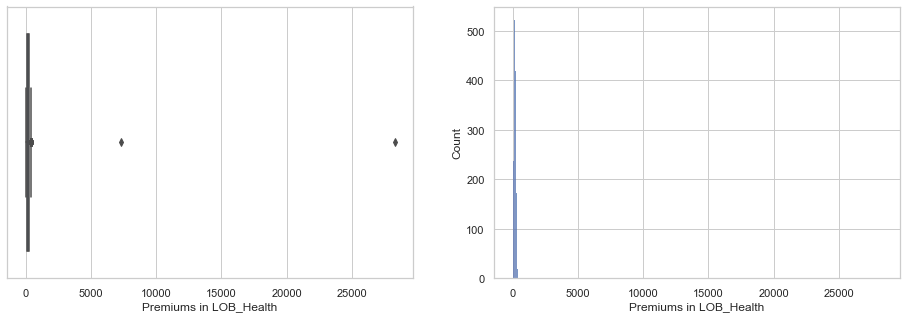

In [180]:
fig, ax =plt.subplots(1,2, figsize =(16,5))
sns.set_theme(style="whitegrid")
sns.boxplot(x=df_out['Premiums in LOB_Health'], ax = ax[0])
sns.histplot(data=df_out, x='Premiums in LOB_Health',ax = ax[1])
plt.show()

In [181]:
# z-score
data =df_out['Premiums in LOB_Health']
# calculate mean
mean = np.mean(data) 
# calculate standard deviation
sd = np.std(data)
# determine a threhold
threshold = 3
# create empty list to store outliers
outliers = []
# detect outlier
for i in data: 
    z = (i-mean)/sd # calculate z-score
    if abs(z) > threshold:  # identify outliers
        outliers.append(i) # add to the empty list
# print outliers    
print("The detected outliers are: ", outliers)

The detected outliers are:  [7322.48, 28272.0]


In [182]:
# remover outlier do dataset
df_out = df_out.drop(df_out[df_out['Premiums in LOB_Health'].isin(outliers)].index)

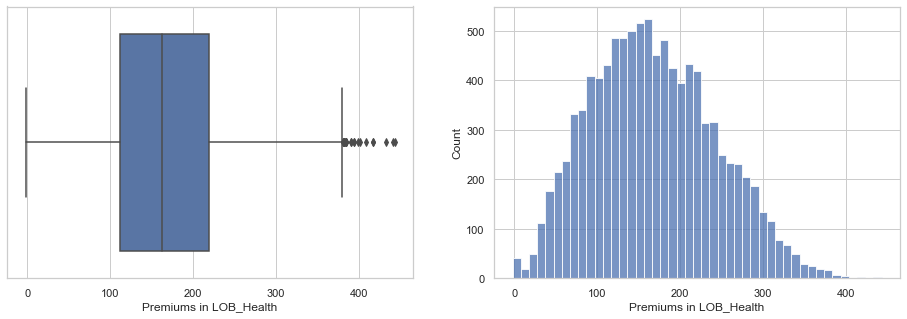

In [183]:
fig, ax =plt.subplots(1,2, figsize =(16,5))
sns.set_theme(style="whitegrid")
sns.boxplot(x=df_out['Premiums in LOB_Health'], ax = ax[0])
sns.histplot(data=df_out, x='Premiums in LOB_Health',ax = ax[1])
plt.show()

### Premiums in LOB_Life

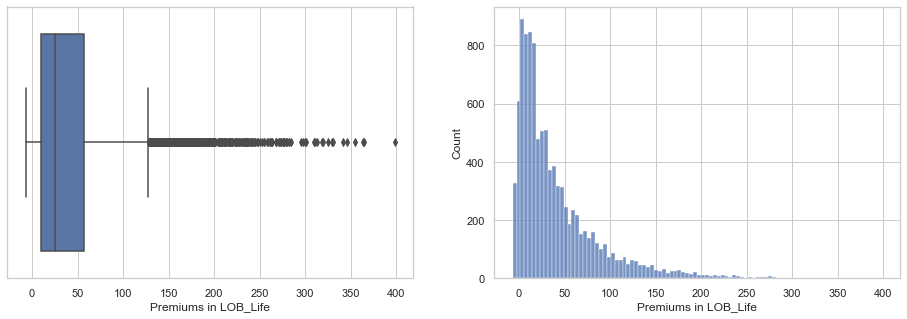

In [184]:
fig, ax =plt.subplots(1,2, figsize =(16,5))
sns.set_theme(style="whitegrid")
sns.boxplot(x=df_out['Premiums in LOB_Life'], ax = ax[0])
sns.histplot(data=df_out, x='Premiums in LOB_Life',ax = ax[1])
plt.show()

In [185]:
# z-score
data =df_out['Premiums in LOB_Life']
# calculate mean
mean = np.mean(data) 
# calculate standard deviation
sd = np.std(data)
# determine a threhold
threshold = 3
# create empty list to store outliers
outliers = []
# detect outlier
for i in data: 
    z = (i-mean)/sd # calculate z-score
    if abs(z) > threshold:  # identify outliers
        outliers.append(i) # add to the empty list
# print outliers    
print("The detected outliers are: ", outliers)

The detected outliers are:  [194.48, 267.94, 224.71, 185.48, 213.04, 197.37, 223.71, 219.04, 231.71, 193.48, 213.15, 242.49, 228.71, 199.37, 201.15, 184.48, 198.37, 252.27, 279.72, 211.93, 193.48, 213.15, 207.26, 261.16, 186.48, 354.4, 244.49, 297.5, 205.26, 300.5, 227.82, 241.49, 201.37, 320.06, 313.28, 224.93, 242.6, 227.82, 235.6, 193.48, 212.15, 275.83, 346.4, 363.29, 193.26, 234.49, 222.82, 190.48, 236.71, 193.48, 195.48, 200.26, 227.82, 240.49, 341.51, 210.04, 219.93, 190.48, 215.04, 208.15, 309.28, 272.05, 193.48, 187.59, 311.28, 398.3, 201.26, 278.83, 228.71, 208.15, 222.71, 238.6, 210.93, 184.59, 197.26, 270.94, 233.6, 213.04, 184.48, 189.37, 282.72, 278.83, 209.04, 215.93, 204.26, 245.38, 187.59, 189.59, 241.49, 191.48, 217.93, 212.04, 230.82, 204.15, 264.16, 187.37, 247.27, 267.94, 198.26, 213.04, 195.48, 214.93, 258.27, 193.37, 324.84, 216.82, 224.93, 198.37, 193.26, 207.15, 236.6, 217.04, 191.48, 190.37, 234.71, 196.26, 329.73, 267.94, 250.38, 194.37, 200.15, 184.48, 222.9

In [186]:
# remover outlier do dataset
df_out = df_out.drop(df_out[df_out['Premiums in LOB_Life'].isin(outliers)].index)

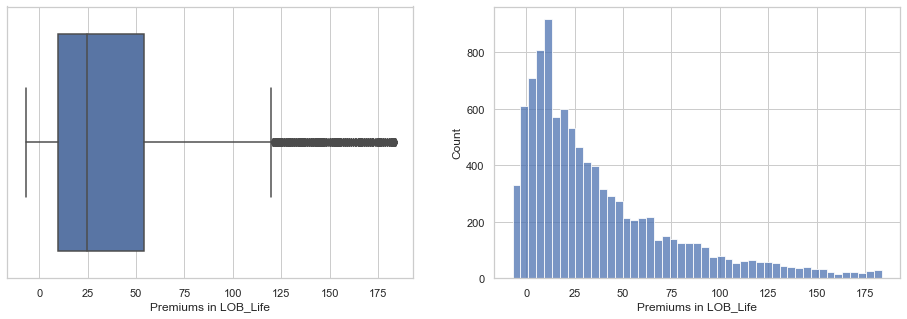

In [187]:
fig, ax =plt.subplots(1,2, figsize =(16,5))
sns.set_theme(style="whitegrid")
sns.boxplot(x=df_out['Premiums in LOB_Life'], ax = ax[0])
sns.histplot(data=df_out, x='Premiums in LOB_Life',ax = ax[1])
plt.show()

### Premiums in LOB_Work Compensations

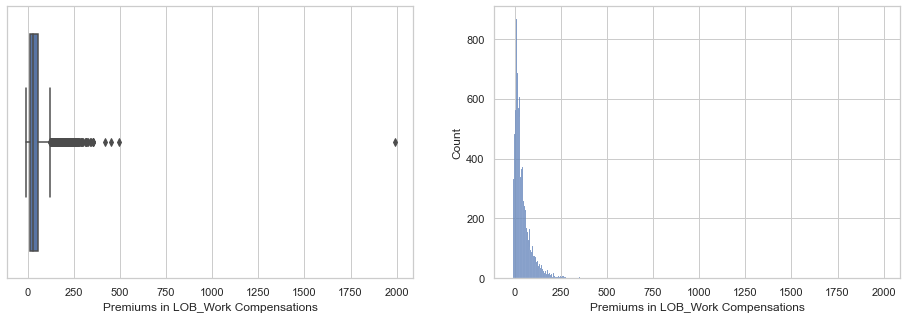

In [188]:
fig, ax =plt.subplots(1,2, figsize =(16,5))
sns.set_theme(style="whitegrid")
sns.boxplot(x=df_out['Premiums in LOB_Work Compensations'], ax = ax[0])
sns.histplot(data=df_out, x='Premiums in LOB_Work Compensations',ax = ax[1])
plt.show()

In [189]:
# z-score
data =df_out['Premiums in LOB_Work Compensations']
# calculate mean
mean = np.mean(data) 
# calculate standard deviation
sd = np.std(data)
# determine a threhold
threshold = 3
# create empty list to store outliers
outliers = []
# detect outlier
for i in data: 
    z = (i-mean)/sd # calculate z-score
    if abs(z) > threshold:  # identify outliers
        outliers.append(i) # add to the empty list
# print outliers    
print("The detected outliers are: ", outliers)

The detected outliers are:  [451.53, 209.04, 212.15, 225.6, 195.37, 249.16, 212.04, 298.5, 208.26, 256.05, 223.93, 249.49, 208.15, 253.49, 239.38, 192.37, 194.59, 218.15, 239.6, 204.37, 195.48, 237.38, 210.26, 494.1, 238.6, 417.08, 234.6, 208.93, 263.16, 197.37, 195.37, 272.94, 205.15, 218.15, 255.38, 352.51, 263.27, 217.82, 212.26, 334.73, 197.37, 214.04, 199.37, 352.62, 207.26, 293.72, 240.49, 197.37, 254.38, 260.94, 194.26, 197.26, 229.82, 339.84, 250.49, 274.72, 208.93, 213.15, 214.15, 234.82, 240.71, 216.93, 257.05, 191.48, 270.94, 312.95, 212.26, 264.16, 248.49, 249.49, 313.95, 212.15, 198.26, 209.93, 1988.7, 264.27, 191.37, 199.37, 200.48, 203.04, 277.94, 212.82, 194.37, 212.93, 229.71, 222.93, 247.27, 322.95, 293.72, 289.72, 260.94, 211.82, 220.93, 212.82, 267.83, 271.05, 212.26, 286.72, 198.37, 256.16, 198.26, 247.49, 236.6, 233.82, 263.94, 205.93, 211.15, 353.18, 213.82, 197.37, 282.5, 261.16, 224.6, 217.15, 310.28, 229.71, 191.37, 266.83, 256.16, 199.26, 273.94, 192.37, 313.

In [190]:
# remover outlier do dataset
df_out = df_out.drop(df_out[df_out['Premiums in LOB_Work Compensations'].isin(outliers)].index)

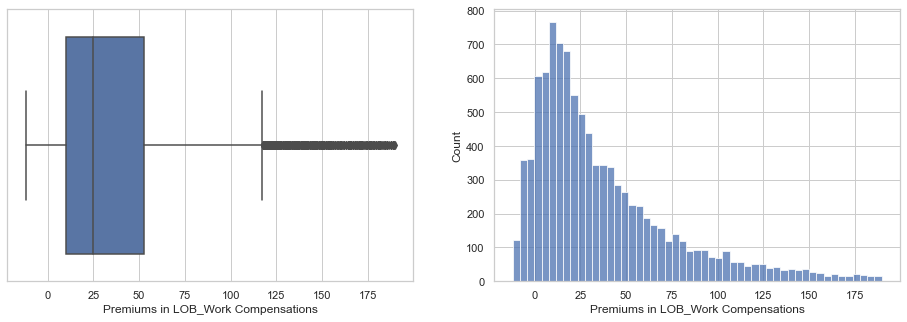

In [191]:
fig, ax =plt.subplots(1,2, figsize =(16,5))
sns.set_theme(style="whitegrid")
sns.boxplot(x=df_out['Premiums in LOB_Work Compensations'], ax = ax[0])
sns.histplot(data=df_out, x='Premiums in LOB_Work Compensations',ax = ax[1])
plt.show()

## Redução de dimensionalidade – PCA

In [192]:
df_data = df_out.copy()

In [193]:
# Remover variável 'Claims Rate'
df_data = df_data.drop(['Claims Rate'], axis=1)
df_data.head()

,First Policy´s Year,Customer Age,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Premiums in LOB_Motor,Premiums in LOB_Household,Premiums in LOB_Health,Premiums in LOB_Life,Premiums in LOB_Work Compensations
Customer Identity,,,,,,,,,,,,
1,1985.0,34.0,2,4354.0,1.0,1.0,380.97,375.85,79.45,146.36,47.01,16.89
3,1991.0,46.0,1,4554.0,3.0,0.0,504.67,206.15,224.50,124.58,86.35,99.02
4,1990.0,35.0,3,2197.0,4.0,1.0,-16.99,182.48,43.35,311.17,35.34,28.34
5,1986.0,43.0,3,3526.0,4.0,1.0,35.23,338.62,47.80,182.59,18.78,41.45
6,1986.0,60.0,2,5132.0,4.0,1.0,-24.33,440.75,18.90,114.80,7.00,7.67


In [194]:
# Standardizing the features
df_data = StandardScaler().fit_transform(df_data)
df_data

array([[-0.15405313, -0.87076252, -0.67350478, ..., -0.30152082,
         0.26222934, -0.51429521],
       [ 0.7561326 , -0.16126574, -1.96674492, ..., -0.59176641,
         1.28646797,  1.62069663],
       [ 0.60443498, -0.81163779,  0.61973537, ...,  1.89477745,
        -0.04160555, -0.21664932],
       ...,
       [ 1.21122547, -0.51601413,  0.61973537, ..., -0.35629168,
        -0.63183152, -0.82623849],
       [-0.76084361, -0.57513886, -1.96674492, ...,  0.39157713,
         0.70196982,  1.98177099],
       [ 0.60443498, -0.81163779,  1.91297552, ..., -0.36961792,
        -0.78231701, -0.6182763 ]])

In [195]:
pca = PCA(n_components=12)
principalComponents = pca.fit_transform(df_data)


In [196]:
exp_var_pca  = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

In [197]:
cum_sum_eigenvalues

array([0.28264561, 0.4730131 , 0.57235391, 0.65589156, 0.73900722,
       0.81594631, 0.86826929, 0.91437647, 0.95353587, 0.99073771,
       0.99699174, 1.        ])

## K-Means


#### Sem os outliers

In [198]:
X = df_out.copy()

In [199]:
# Remover variável 'Claims Rate'
X = X.drop(['Claims Rate'], axis=1)
X.head()

,First Policy´s Year,Customer Age,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Premiums in LOB_Motor,Premiums in LOB_Household,Premiums in LOB_Health,Premiums in LOB_Life,Premiums in LOB_Work Compensations
Customer Identity,,,,,,,,,,,,
1,1985.0,34.0,2,4354.0,1.0,1.0,380.97,375.85,79.45,146.36,47.01,16.89
3,1991.0,46.0,1,4554.0,3.0,0.0,504.67,206.15,224.50,124.58,86.35,99.02
4,1990.0,35.0,3,2197.0,4.0,1.0,-16.99,182.48,43.35,311.17,35.34,28.34
5,1986.0,43.0,3,3526.0,4.0,1.0,35.23,338.62,47.80,182.59,18.78,41.45
6,1986.0,60.0,2,5132.0,4.0,1.0,-24.33,440.75,18.90,114.80,7.00,7.67


In [200]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9789 entries, 1 to 10296
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   First Policy´s Year                 9789 non-null   float64
 1   Customer Age                        9789 non-null   float64
 2   Educational Degree                  9789 non-null   object 
 3   Gross Monthly Salary                9789 non-null   float64
 4   Geographic Living Area              9789 non-null   float64
 5   Has Children (Y=1)                  9789 non-null   float64
 6   Customer Monetary Value             9789 non-null   float64
 7   Premiums in LOB_Motor               9789 non-null   float64
 8   Premiums in LOB_Household           9789 non-null   float64
 9   Premiums in LOB_Health              9789 non-null   float64
 10  Premiums in LOB_Life                9789 non-null   float64
 11  Premiums in LOB_Work Compensations  9789 n

In [201]:
encode = LabelEncoder()
encoded_degree = encode.fit_transform(X['Educational Degree'])
X['Educational Degree'] = encoded_degree

In [202]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9789 entries, 1 to 10296
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   First Policy´s Year                 9789 non-null   float64
 1   Customer Age                        9789 non-null   float64
 2   Educational Degree                  9789 non-null   int32  
 3   Gross Monthly Salary                9789 non-null   float64
 4   Geographic Living Area              9789 non-null   float64
 5   Has Children (Y=1)                  9789 non-null   float64
 6   Customer Monetary Value             9789 non-null   float64
 7   Premiums in LOB_Motor               9789 non-null   float64
 8   Premiums in LOB_Household           9789 non-null   float64
 9   Premiums in LOB_Health              9789 non-null   float64
 10  Premiums in LOB_Life                9789 non-null   float64
 11  Premiums in LOB_Work Compensations  9789 n

In [203]:
# Standardizing the features
X = StandardScaler().fit_transform(X)
X

array([[-0.15405313, -0.87076252, -0.67350478, ..., -0.30152082,
         0.26222934, -0.51429521],
       [ 0.7561326 , -0.16126574, -1.96674492, ..., -0.59176641,
         1.28646797,  1.62069663],
       [ 0.60443498, -0.81163779,  0.61973537, ...,  1.89477745,
        -0.04160555, -0.21664932],
       ...,
       [ 1.21122547, -0.51601413,  0.61973537, ..., -0.35629168,
        -0.63183152, -0.82623849],
       [-0.76084361, -0.57513886, -1.96674492, ...,  0.39157713,
         0.70196982,  1.98177099],
       [ 0.60443498, -0.81163779,  1.91297552, ..., -0.36961792,
        -0.78231701, -0.6182763 ]])

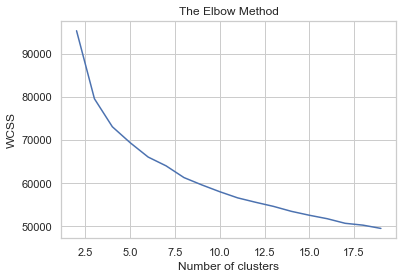

In [204]:
wcss = []
for i in range(2, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [205]:
pca_reducer = PCA(n_components=2)
reduced_data = pca_reducer.fit_transform(X)
reduced_data = pd.DataFrame(data = reduced_data)

In [206]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(reduced_data)
clust_labels = kmeans.predict(reduced_data)
cent = kmeans.cluster_centers_
kmeans = pd.DataFrame(clust_labels)

Text(0, 0.5, 'PC2')

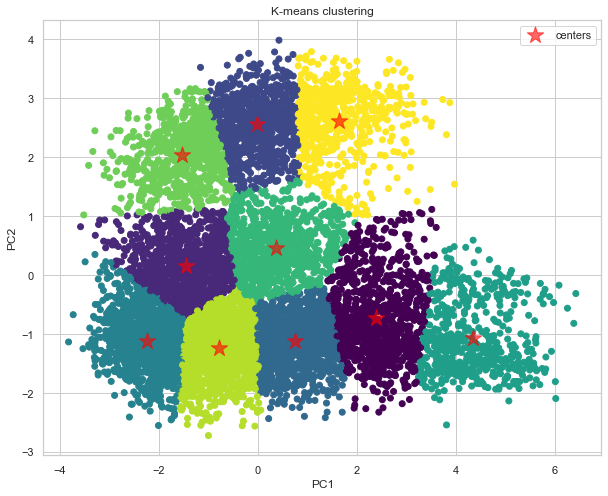

In [207]:
plt.figure(figsize=(10, 8))
# K-means clustering
plt.scatter(reduced_data[0],reduced_data[1],
                     c=kmeans[0], cmap='viridis')
plt.scatter(cent[:, 0], cent[:, 1],c='red', marker='*', s=300, alpha=0.6, label='centers')
plt.legend(loc='best')
plt.title('K-means clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')

#### Com os outliers

In [208]:
X1 = df.copy()
# Remover variável 'Claims Rate'
X1 = X1.drop(['Claims Rate'], axis=1)
X1.head()

,First Policy´s Year,Customer Age,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Premiums in LOB_Motor,Premiums in LOB_Household,Premiums in LOB_Health,Premiums in LOB_Life,Premiums in LOB_Work Compensations
Customer Identity,,,,,,,,,,,,
1,1985.0,34.0,2,4354.0,1.0,1.0,380.97,375.85,79.45,146.36,47.01,16.89
2,1981.0,21.0,2,1353.0,4.0,1.0,-131.13,77.46,416.20,116.69,194.48,106.13
3,1991.0,46.0,1,4554.0,3.0,0.0,504.67,206.15,224.50,124.58,86.35,99.02
4,1990.0,35.0,3,2197.0,4.0,1.0,-16.99,182.48,43.35,311.17,35.34,28.34
5,1986.0,43.0,3,3526.0,4.0,1.0,35.23,338.62,47.80,182.59,18.78,41.45


In [209]:
encode = LabelEncoder()
encoded_degree = encode.fit_transform(X1['Educational Degree'])
X1['Educational Degree'] = encoded_degree
X1.head()

,First Policy´s Year,Customer Age,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Premiums in LOB_Motor,Premiums in LOB_Household,Premiums in LOB_Health,Premiums in LOB_Life,Premiums in LOB_Work Compensations
Customer Identity,,,,,,,,,,,,
1,1985.0,34.0,1,4354.0,1.0,1.0,380.97,375.85,79.45,146.36,47.01,16.89
2,1981.0,21.0,1,1353.0,4.0,1.0,-131.13,77.46,416.20,116.69,194.48,106.13
3,1991.0,46.0,0,4554.0,3.0,0.0,504.67,206.15,224.50,124.58,86.35,99.02
4,1990.0,35.0,2,2197.0,4.0,1.0,-16.99,182.48,43.35,311.17,35.34,28.34
5,1986.0,43.0,2,3526.0,4.0,1.0,35.23,338.62,47.80,182.59,18.78,41.45


In [210]:
# Standardizing the features
X1 = StandardScaler().fit_transform(X1)

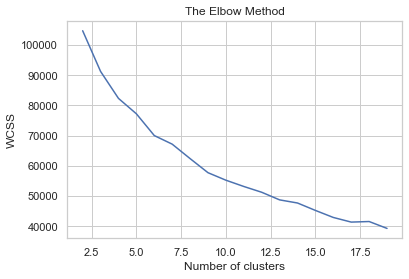

In [211]:
wcss = []
for i in range(2, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [212]:
pca_reducer = PCA(n_components=2)
reduced_data = pca_reducer.fit_transform(X1)
reduced_data = pd.DataFrame(data = reduced_data)

In [213]:
kmeans = KMeans(n_clusters=13)
kmeans.fit(reduced_data)
clust_labels = kmeans.predict(reduced_data)
cent = kmeans.cluster_centers_
kmeans = pd.DataFrame(clust_labels)

Text(0, 0.5, 'PC2')

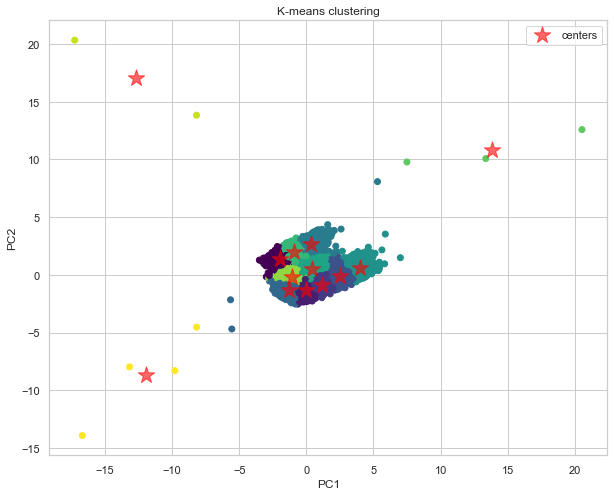

In [214]:
plt.figure(figsize=(10, 8))
# K-means clustering
plt.scatter(reduced_data[0],reduced_data[1],
                     c=kmeans[0], cmap='viridis')
plt.scatter(cent[:, 0], cent[:, 1],c='red', marker='*', s=300, alpha=0.6, label='centers')
plt.legend(loc='best')
plt.title('K-means clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')